<a href="https://colab.research.google.com/github/ycyoondev/ML-study/blob/master/221104_ml_sample_study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
base_dir = '/content/drive/MyDrive/Colab_Notebooks/elice_study'
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## ML

#### 당뇨 진행상황을 선형 회귀로 예측 해보기


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.linear_model import ElasticNet
from sklearn.metrics import r2_score

"""
    1. 학습을 위한 준비가 완료된 데이터를 반환하는
       load_data() 함수를 구현합니다.
       
       Step01. 당뇨병 관련 데이터셋을 (X, y)의 형태로 불러옵니다. 
              
       Step02. 모델 학습을 위해 데이터를 
               학습용(80%)/테스트용(20%)로 분리합니다.
               (random_state = 100)
"""

def load_data():
    X, y = load_diabetes(return_X_y = True)
    train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.2, random_state=100)
    
    return train_X, test_X, train_y, test_y
    
    
"""
    2. 회귀 모델을 불러오고,
       테스트 데이터에 대한 예측 결과를 반환하는
       reg_model() 함수를 구현합니다.
"""
def reg_model(train_X, test_X, train_y):
    
    ElasticNet_reg = ElasticNet(alpha=0.0001, l1_ratio=0.001)
    
    ElasticNet_reg.fit(train_X, train_y)

    pred = ElasticNet_reg.predict(test_X)

    return pred
    

"""
    3. 구현한 회귀 모델의 r_square 값을
       반환하는 r_square() 함수를 구현합니다.

"""
def r_square(pred, test_y):

    r2 = r2_score(test_y, pred)
    
    return r2
    
    
"""
    4. 구현한 함수들을 활용하여 
       당뇨병 데이터에 대한 회귀를 진행하는 
       main() 함수를 구현합니다.
"""
def main():
    
    train_X, test_X, train_y, test_y = load_data()
    pred = reg_model(train_X, test_X, train_y)
    r2 = r_square(pred, test_y)
    
    print("r2 score : ",r2)
    
    
if __name__ == "__main__":
    main()

r2 score :  0.5074319252430999


#### SVM(Support Vector Machine)

In [ ]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  

import warnings
warnings.filterwarnings(action='ignore')

from sklearn.model_selection import train_test_split  
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix 
"""
1. data 폴더 내에 있는 dataset.csv파일을 불러오고, 
   학습용 데이터와 테스트용 데이터를 분리하여 
   반환하는 함수를 구현합니다.
   
   Step01. pandas의 read_csv() 함수를 이용하여 
           data 폴더 내에 있는 dataset.csv파일을
           불러옵니다. 
   
   Step02. 데이터 X와 y를 분리합니다.
           데이터 폴더에 있는 dataset.csv 파일을
           확인하고,
           
           X 데이터와 y 데이터를 분리하여 각 변수에
           저장합니다.
"""
def load_data():
    
    data = pd.read_csv(base_dir+'/data/1/data_dataset.csv')

    X = data.drop('Class', axis=1)
    y = data['Class']
    
    train_X, test_X, train_y, test_y = train_test_split(X, y, test_size = 0.2, random_state = 0)
    print(X, y)
    return train_X, test_X, train_y, test_y
    
"""
2. SVM 모델을 불러오고,
   학습용 데이터에 맞추어 학습시킨 후, 
   테스트 데이터에 대한 예측 결과를 반환하는 함수를
   구현합니다.
   
   Step01. SVM 모델을 정의합니다.
   
   Step02. SVM 모델을 학습용 데이터에 맞추어
           학습시킵니다.
   
   Step03. 학습된 모델을 이용하여 
           테스트 데이터에 대한 예측을 수행합니다. 
"""
def SVM(train_X, test_X, train_y, test_y):
    
    svm = SVC()
    
    svm.fit(train_X, train_y)
    
    pred_y = svm.predict(test_X)
    
    return pred_y
    
# 데이터를 불러오고, 모델 예측 결과를 확인하는 main 함수입니다.
def main():
    
    train_X, test_X, train_y, test_y = load_data()
    
    pred_y = SVM(train_X, test_X, train_y, test_y)
    
    # SVM 분류 결과값을 출력합니다.
    print("\nConfusion matrix : \n",confusion_matrix(test_y,pred_y))  
    print("\nReport : \n",classification_report(test_y,pred_y)) 

if __name__ == "__main__":
    main()


      Factor01   Factor2   Factor3  Factor4
0      4.67650  -3.38950   3.48960  1.47710
1      2.67190   3.06460   0.37158  0.58619
2      0.80355   2.84730   4.34390  0.60170
3      1.44790  -4.87940   8.34280 -2.10860
4      5.24230  11.02720  -4.35300 -4.10130
...        ...       ...       ...      ...
1367   0.40614   1.34920  -1.45010 -0.55949
1368  -1.38870  -4.87730   6.47740  0.34179
1369  -3.75030 -13.45860  17.59320 -2.77710
1370  -3.56370  -8.38270  12.39300 -1.28230
1371  -2.54190  -0.65804   2.68420  1.19520

[1372 rows x 4 columns] 0       0
1       0
2       0
3       0
4       0
       ..
1367    1
1368    1
1369    1
1370    1
1371    1
Name: Class, Length: 1372, dtype: int64

Confusion matrix : 
 [[157   0]
 [  0 118]]

Report : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       157
           1       1.00      1.00      1.00       118

    accuracy                           1.00       275
   macro avg       1.0

#### 사이킷런을 활용한 나이브 베이즈 분류

In [ ]:
from sklearn.datasets import load_wine

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

"""
1. 데이터를 불러오고, 
   불러온 데이터를 학습용, 테스트용 데이터로 
   분리하여 반환하는 함수를 구현합니다.
   
   Step01. 사이킷런에 저장되어 있는 데이터를 
           (X, y) 형태로 불러옵니다.
   
   Step02. 불러온 데이터를 
           학습용 데이터와 테스트용 데이터로 분리합니다.
           
           학습용 데이터 : 80%, 테스트용 데이터 : 20%, 
           
           일관된 결과 확인을 위해 random_state를 
           0 으로 설정합니다.
"""
def load_data():
    
    X, y = load_wine(return_X_y = True)
    
    print("데이터 확인해보기 :\n", X[:1])
    
    train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.2, random_state=0)
    
    return train_X, test_X, train_y, test_y
    
"""
2. 가우시안 나이브 베이즈 모델을 불러오고,
   학습을 진행한 후 테스트 데이터에 대한 
   예측값을 반환하는 함수를 구현합니다.
   
   Step01. 가우시안 나이브 베이즈 모델을 정의합니다.
   
   Step02. 학습용 데이터에 대해 모델을 학습시킵니다.
   
   Step03. 테스트 데이터에 대한 모델 예측을 수행합니다.
"""
def Gaussian_NB(train_X, test_X, train_y, test_y):
    
    model = GaussianNB()
    
    model.fit(train_X, train_y)
    
    predicted = model.predict(test_X)
    
    return predicted
    
# 데이터 불러오기, 모델 예측 결과를 확인할 수 있는 함수입니다.
def main():
    
    train_X, test_X, train_y, test_y = load_data()
    
    predicted = Gaussian_NB(train_X, test_X, train_y, test_y)
    
    ## 모델 정확도를 통해 분류 성능을 확인해봅니다.
    print("\nModel Accuracy : ")
    print(accuracy_score(test_y, predicted))

if __name__ == "__main__":
    main()


데이터 확인해보기 :
 [[1.423e+01 1.710e+00 2.430e+00 1.560e+01 1.270e+02 2.800e+00 3.060e+00
  2.800e-01 2.290e+00 5.640e+00 1.040e+00 3.920e+00 1.065e+03]]

Model Accuracy : 
0.9166666666666666


#### Confusion Matrix를 통한 문자 인식률 확인하기

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_digits

from sklearn.svm import SVC

from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score

import warnings
warnings.filterwarnings(action = 'ignore')

"""
    1. digits 데이터를 불러오고,
       학습을 위한 전처리를 진행하는 
       load_data() 함수를 구현합니다.
       
       Step01. digits 데이터를 불러옵니다.
       
       Step02. 데이터를 학습용 데이터와 
               테스트용 데이터로 분리합니다.
               (train:80%, test:20%, random_state:100)
"""
def load_data():
    X, y  = load_digits(return_X_y = True)
     
    train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.2, random_state=100)
    
    return train_X, test_X, train_y, test_y
    
    
"""
    2. SVM 분류기를 활용하여 
       테스트 데이터에 대한 예측값을 반환하는 
       SVM_clf() 함수를 구현합니다.
"""
def SVM_clf(train_X, test_X, train_y):
    svm = SVC()
    
    svm.fit(train_X, train_y)
    
    pred = svm.predict(test_X)
    
    return pred


"""
    3. 출력된 Confusion Matrix 를 통해 
       인덱스 3의 precision과 recall, 
       그리고 전체 데이터에 대한 accuracy를 
       계산하여 반환하는 cal_eval() 함수를 구현합니다.

"""
def cal_eval(test_y, pred):
    index_3_precision = precision_score(test_y, pred, average=None)[3]
    index_3_recall = recall_score(test_y, pred, average=None)[3]
    accuracy = accuracy_score(test_y, pred)
    
    return index_3_precision, index_3_recall, accuracy

"""
    4. 구현한 함수를 활용하여 다중 클래스 분류를 진행하고,
       결과를 확인하기 위한 main() 함수를 구현합니다.
"""
def main():
    
    train_X, test_X, train_y, test_y = load_data()
    
    pred = SVM_clf(train_X, test_X, train_y)
    
    # 학습된 모델로 digit data가 제대로 예측 됐는 지 
    # 확인하기위한 confusion matrix를 호출합니다.
    print("Confusion matrix results :\n\t- row : real(test_y) 0 ~ 9 label\n\t- column : predicted 0 ~ 9 label\n\n%s\n"  % confusion_matrix(test_y, pred))
    
    index_3_precision, index_3_recall, accuracy = cal_eval(test_y, pred)

    print("index 3의 recall : %f" % index_3_recall)
    print("index 3의 precision : %f" % index_3_precision)
    print("전체 accuracy : %f" % accuracy)
    
    # 랜덤으로 뽑은 4개의 데이터를 학습된 모델로 
    # 제대로 예측 했는 지 시각화 합니다.
    # draw_digit_images(test_X, test_y, pred)

if __name__ == "__main__":
    main()

Confusion matrix results :
	- row : real(test_y) 0 ~ 9 label
	- column : predicted 0 ~ 9 label

[[42  0  0  0  0  0  0  0  0  0]
 [ 0 32  0  0  0  0  0  0  0  0]
 [ 0  0 41  0  0  0  0  0  0  0]
 [ 0  0  0 32  0  0  0  0  0  0]
 [ 0  0  0  0 34  0  0  0  1  1]
 [ 0  0  0  0  0 35  0  0  0  0]
 [ 0  0  0  0  0  0 40  0  0  0]
 [ 0  0  0  0  0  0  0 39  0  0]
 [ 0  1  0  0  0  0  0  0 26  0]
 [ 0  0  0  0  0  0  0  0  0 36]]

index 3의 recall : 1.000000
index 3의 precision : 1.000000
전체 accuracy : 0.991667


#### Iris K-Means 클러스터링

target  cluster
0       1          50
1       0          48
        2           2
2       0          14
        2          36
Name: sepal length (cm), dtype: int64
Figure(432x288)


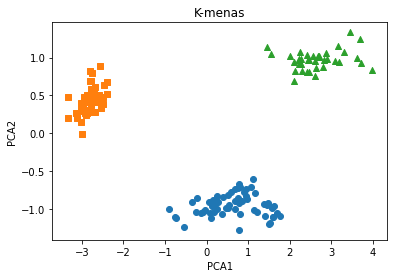

In [ ]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# from elice_utils import EliceUtils
# elice_utils = EliceUtils()

# 데이터를 불러오고, 데이터 프레임 형태로 만든 후 반환하는 함수입니다.
def load_data():
    
    iris = load_iris()
    
    irisDF = pd.DataFrame(data = iris.data, columns = iris.feature_names)
    
    irisDF['target'] = iris.target
    
    return irisDF
    
"""
1. K-means 클러스터링을 
   수행하는 함수를 구현합니다.
   
   Step01. K-Means 객체를 불러옵니다.
           
           군집의 개수는 3, 
           중심점 초기화는 랜덤,
           random_state = 100으로 설정합니다.
           
   Step02. K-means 클러스터링을 수행합니다.
           
           클러스터링은 정답이 없는 데이터를
           사용하기 때문에 target 변수를 제거한
           데이터를 학습시켜줍니다.
           
   Step03. 군집화 결과 즉, 각 데이터가 속한 군집
           중심점들의 label을 
           iris 데이터 프레임에 추가합니다.
"""
def k_means_clus(irisDF):
    
    kmeans = KMeans(init='random',n_clusters=3, random_state=100)

    kmeans.fit(irisDF.iloc[:,[0,1,2,3]])
    # kmeans.fit(irisDF.drop('target', axis=1))
    
    irisDF['cluster'] = kmeans.labels_
    
    # 군집화 결과를 보기 위해 groupby 함수를 사용해보겠습니다.
    iris_result = irisDF.groupby(['target','cluster'])['sepal length (cm)'].count()
    print(iris_result)
    
    return iris_result, irisDF

# 군집화 결과 시각화하기
def Visualize(irisDF):
    
    pca = PCA(n_components=2)
    pca_transformed = pca.fit_transform(irisDF)

    irisDF['pca_x'] = pca_transformed[:,0]
    irisDF['pca_y'] = pca_transformed[:,1]

    # 군집된 값이 0, 1, 2 인 경우, 인덱스 추출
    idx_0 = irisDF[irisDF['cluster'] == 0].index
    idx_1 = irisDF[irisDF['cluster'] == 1].index
    idx_2 = irisDF[irisDF['cluster'] == 2].index
    
    # 각 군집 인덱스의 pca_x, pca_y 값 추출 및 시각화
    fig, ax = plt.subplots()
    
    ax.scatter(x=irisDF.loc[idx_0, 'pca_x'], y= irisDF.loc[idx_0, 'pca_y'], marker = 'o')
    ax.scatter(x=irisDF.loc[idx_1, 'pca_x'], y= irisDF.loc[idx_1, 'pca_y'], marker = 's')
    ax.scatter(x=irisDF.loc[idx_2, 'pca_x'], y= irisDF.loc[idx_2, 'pca_y'], marker = '^')
    ax.set_title('K-menas')
    ax.set_xlabel('PCA1')
    ax.set_ylabel('PCA2')
    
    fig.savefig("plot.png")
    print(fig)
    # elice_utils.send_image("plot.png")


def main():
    
    irisDF = load_data()

    iris_result, irisDF = k_means_clus(irisDF)
    
    Visualize(irisDF)
    
if __name__ == "__main__":
    main()


#### Iris Gaussian Mixture Model (GMM)

target  cluster
0       0          50
1       1          45
        2           5
2       2          50
Name: sepal length (cm), dtype: int64
Figure(432x288)


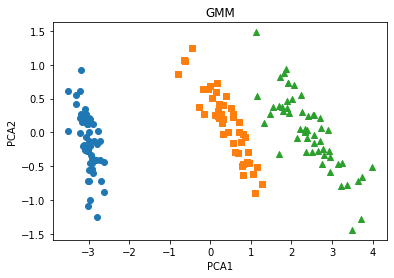

In [ ]:
import pandas as pd
import numpy as np
from sklearn.mixture import GaussianMixture
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# from elice_utils import EliceUtils
# elice_utils = EliceUtils()

# 데이터를 불러오고, 데이터 프레임 형태로 만든 후 반환하는 함수입니다.
def load_data():
    
    iris = load_iris()
    
    irisDF = pd.DataFrame(data = iris.data, columns = iris.feature_names)
    
    irisDF['target'] = iris.target
    
    return irisDF
    
"""
1. GMM 클러스터링을 
   수행하는 함수를 구현합니다.
   
   Step01. GMM 객체를 불러옵니다.
           
           군집의 개수는 3,
           일관된 결과 확인을 위해 
           random_state를 100으로 설정합니다.
           
   Step02. GMM 클러스터링을 수행합니다.
           
           클러스터링은 정답이 없는 데이터를
           사용하기 때문에 target 변수를 제거한
           데이터를 학습시켜줍니다.
           
   Step03. 군집화 결과를 
           iris 데이터 프레임에 추가합니다.
           
"""
def gmm_clus(irisDF):
    
    gmm = GaussianMixture(n_components = 3, random_state = 100)
    
    gmm.fit(irisDF.drop('target', axis=1))
    
    irisDF['cluster'] = gmm.predict(irisDF.drop('target', axis=1))
    
    # 군집화 결과를 보기 위해 groupby 함수를 사용해보겠습니다.
    iris_result = irisDF.groupby(['target','cluster'])['sepal length (cm)'].count()
    print(iris_result)
    
    return iris_result, irisDF

# 군집화 결과 시각화하기
def Visualize(irisDF):
    
    pca = PCA(n_components=2)
    pca_transformed = pca.fit_transform(irisDF)

    irisDF['pca_x'] = pca_transformed[:,0]
    irisDF['pca_y'] = pca_transformed[:,1]

    # 군집된 값이 0, 1, 2 인 경우, 인덱스 추출
    idx_0 = irisDF[irisDF['cluster'] == 0].index
    idx_1 = irisDF[irisDF['cluster'] == 1].index
    idx_2 = irisDF[irisDF['cluster'] == 2].index
    
    # 각 군집 인덱스의 pca_x, pca_y 값 추출 및 시각화
    fig, ax = plt.subplots()
    
    ax.scatter(x=irisDF.loc[idx_0, 'pca_x'], y= irisDF.loc[idx_0, 'pca_y'], marker = 'o')
    ax.scatter(x=irisDF.loc[idx_1, 'pca_x'], y= irisDF.loc[idx_1, 'pca_y'], marker = 's')
    ax.scatter(x=irisDF.loc[idx_2, 'pca_x'], y= irisDF.loc[idx_2, 'pca_y'], marker = '^')
    ax.set_title('GMM')
    ax.set_xlabel('PCA1')
    ax.set_ylabel('PCA2')
    
    fig.savefig("plot.png")
    print(fig)
    # elice_utils.send_image("plot.png")


def main():
    
    irisDF = load_data()
    
    iris_result, irisDF = gmm_clus(irisDF)
    
    Visualize(irisDF)
    
    
if __name__ == "__main__":
    main()

#### Wine 주성분 분석(PCA)

[[3.06 0.28]
 [2.76 0.26]
 [3.24 0.3 ]
 [3.49 0.24]
 [2.69 0.39]
 [3.39 0.34]
 [2.52 0.3 ]
 [2.51 0.31]
 [2.98 0.29]
 [3.15 0.22]
 [3.32 0.22]
 [2.43 0.26]
 [2.76 0.29]
 [3.69 0.43]
 [3.64 0.29]
 [2.91 0.3 ]
 [3.14 0.33]
 [3.4  0.4 ]
 [3.93 0.32]
 [3.03 0.17]
 [3.17 0.24]
 [2.41 0.25]
 [2.88 0.27]
 [2.37 0.26]
 [2.61 0.28]
 [2.68 0.47]
 [2.94 0.34]
 [2.19 0.27]
 [2.97 0.37]
 [2.33 0.26]
 [3.25 0.29]
 [3.19 0.22]
 [2.69 0.42]
 [2.74 0.5 ]
 [2.53 0.29]
 [2.98 0.26]
 [2.68 0.34]
 [2.43 0.29]
 [2.64 0.28]
 [3.04 0.2 ]
 [3.29 0.34]
 [2.68 0.27]
 [3.56 0.17]
 [2.63 0.32]
 [3.   0.28]
 [2.65 0.3 ]
 [3.17 0.27]
 [3.39 0.21]
 [2.92 0.32]
 [3.54 0.32]
 [3.27 0.17]
 [2.99 0.22]
 [3.74 0.32]
 [2.79 0.39]
 [2.9  0.21]
 [2.78 0.2 ]
 [3.   0.26]
 [3.23 0.31]
 [3.67 0.19]
 [0.57 0.28]
 [1.09 0.63]
 [1.41 0.53]
 [1.79 0.32]
 [3.1  0.19]
 [1.75 0.45]
 [2.65 0.37]
 [3.18 0.26]
 [2.   0.27]
 [1.3  0.55]
 [1.28 0.14]
 [1.02 0.37]
 [2.86 0.21]
 [1.84 0.27]
 [2.89 0.21]
 [2.14 0.13]
 [1.57 0.34]
 [2.03 0.24]

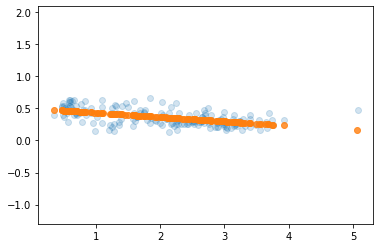

In [ ]:
# from elice_utils import EliceUtils
# elice_utils = EliceUtils()

import numpy as np
from sklearn.decomposition import PCA
from sklearn.datasets import load_wine
import matplotlib.pyplot as plt

"""
1. 사이킷런에 저장된 데이터를 불러오고, 
   2개의 변수만을 가질 수 있도록 
   고정하여 반환하는 함수를 구현합니다.
   
   Step01. 사이킷런에 저장된 데이터를 불러옵니다.
           데이터는 (X, y) 형태로 불러와야 합니다.
           
   Step02. column_start로 지정된 특정 column으로부터
           연속되는 2개의 변수를 X에 저장합니다.
          
"""
def load_data():
    
    X, y = load_wine(return_X_y = True)
    
    column_start = 6
    # X = X[:,[column_start, column_start+2]]
    X = X[:,column_start : column_start+2]
    print(X)
    return X
"""
2. 주성분 분석(PCA)을 수행하여 
   2차원 데이터를 1차원으로 축소하는 함수를 완성합니다.
   
   Step01. PCA의 n_components를 1로 지정하여 
           pca 를 정의합니다.
           
   Step02. 주성분 분석을 수행합니다.
   
   Step03. X_pca 값을 추출합니다.
"""
def pca_data(X):
    
    pca = PCA(1)
    
    pca.fit(X)
    
    X_pca = pca.transform(X)
    
    return pca, X_pca

# 축소된 주성분 축과 데이터 산점도를 그려주는 함수입니다.
def visualize(pca, X, X_pca):
    X_new = pca.inverse_transform(X_pca)
    
    plt.scatter(X[:, 0], X[:, 1], alpha=0.2)
    plt.scatter(X_new[:, 0], X_new[:, 1], alpha=0.8)
    plt.axis('equal');
    
    plt.savefig('PCA.png')
    print(plt)
    # elice_utils.send_image('PCA.png')

def main():
    
    X = load_data()
    
    pca, X_pca = pca_data(X)
    
    print("- original shape:   ", X.shape)
    print("- transformed shape:", X_pca.shape)
    
    visualize(pca, X, X_pca)
    
if __name__ == '__main__':
    main()

#### Wine t-SNE

In [ ]:
import numpy as np
from sklearn.manifold import TSNE
from sklearn.datasets import load_wine
import matplotlib.pyplot as plt

# from elice_utils import EliceUtils
# elice_utils = EliceUtils()

"""
1. 데이터를 불러오고, 
   2개의 변수만을 가질 수 있도록 고정하여 
   반환하는 함수를 구현합니다.
   
   Step01. 사이킷런에 저장된 데이터를 불러옵니다.
           데이터는 (X, y) 형태로 불러와야 합니다.
           
   Step02. column_start로 지정된 특정 column으로부터
           연속되는 2개의 변수를 X에 저장합니다.   
   [실습4]에서 구현한 함수를 그대로 사용할 수 있습니다. 
"""
def load_data():
    
    X, y = load_wine(return_X_y = True)
    
    column_start = 6
    X = X[:,column_start : column_start+2]
    
    return X
    
"""
2. t-SNE를 활용하여 
   2차원 데이터를 1차원으로 축소하는 함수를 완성합니다.
   
   Step01. t-SNE의 n_components를 1로 지정하여 
           tsne를 정의합니다.
           
   Step02. tsne를 활용하여 차원 축소를 진행한 후,
           차원이 축소된 데이터 X_tsne를 추출합니다.
"""
def tsne_data(X):
    
    tsne = TSNE(1)
    
    X_tsne = tsne.fit_transform(X)
    
    return tsne, X_tsne

def main():
    
    X = load_data()
    
    tsne, X_tsne = tsne_data(X)
    
    print("- original shape:   ", X.shape)
    print("- transformed shape:", X_tsne.shape)
    
    print("\n원본 데이터 X :\n", X[:5])
    print("\n차원 축소 이후 데이터 X_tsne\n",X_tsne[:5])
    
    
if __name__ == '__main__':
    main()

- original shape:    (178, 2)
- transformed shape: (178, 1)

원본 데이터 X :
 [[3.06 0.28]
 [2.76 0.26]
 [3.24 0.3 ]
 [3.49 0.24]
 [2.69 0.39]]

차원 축소 이후 데이터 X_tsne
 [[ 8.782846 ]
 [ 5.358518 ]
 [10.335532 ]
 [11.6100645]
 [ 4.2831798]]


#### 차원축소로 머신러닝 성능 향상시키기

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/dist-packages/matplotlib/pyplot.py'>
<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/dist-packages/matplotlib/pyplot.py'>
<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/dist-packages/matplotlib/pyplot.py'>
<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/dist-packages/matplotlib/pyplot.py'>
<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/dist-packages/matplotlib/pyplot.py'>


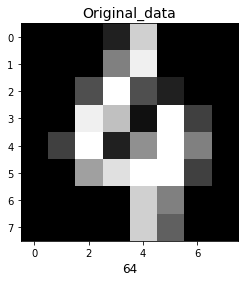

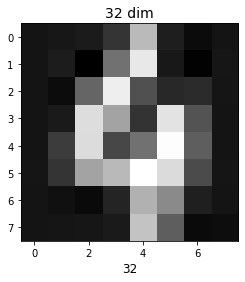

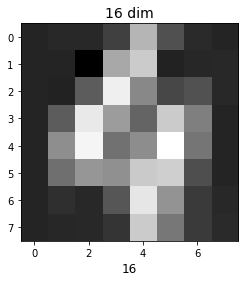

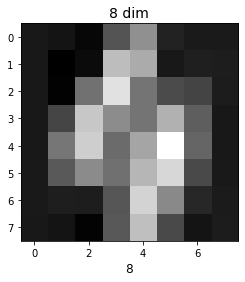

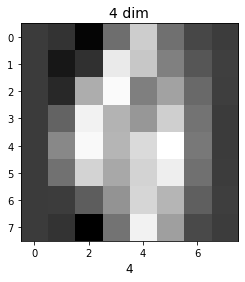

In [ ]:
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA

import numpy as np
import matplotlib.pyplot as plt

# from elice_utils import EliceUtils
# elice_utils = EliceUtils()

"""
    1. digits 데이터를 불러오는
       load_data() 함수를 구현합니다.
"""
def load_data():
    X, y = load_digits(return_X_y = True)
    
    return X, y

"""
    2. PCA 알고리즘을 활용하여 차원을 축소하고,
       다시 이미지로 복원한 결과를 확인하기 위한
       train_PCA_and_restore_image() 함수를 구현합니다.
       
       Step01. dim_reduction_number개의 차원으로 축소하는 
               PCA 모델을 생성합니다.
       
       Step02. 생성한 PCA 모델을 이용하여 차원 축소를 진행합니다.
       
       Step03. 축소된 데이터를 다시 이미지 데이터로 복원합니다.
       
       Step04. 축소된 이미지의 log-likelihood를 통해 점수를 확인합니다.
"""
def train_PCA_and_restore_image(dim_reduction_number, images): 
    pca = PCA(dim_reduction_number)
    
    pca.fit(images)

    components = pca.transform(images)
    
    approxOriginal = pca.inverse_transform(components)
    
    score = pca.score(approxOriginal)

    return approxOriginal, score
    
"""
digit 이미지를 시각화합니다.
"""
def visualize(X, x_label, title):
    
    plt.figure(figsize=(5,4));
    n_data = 100
    
    plt.imshow(X[n_data].reshape(8, 8),
                  cmap = plt.cm.gray, interpolation='nearest')
    plt.xlabel(x_label, fontsize = 12)
    plt.title(title, fontsize = 14)
    
    plt.savefig('PCA.png')
    print(plt)
    # elice_utils.send_image('PCA.png')
    
"""
    3. 구현한 함수를 활용하여 차원 축소를 진행하고
       시각화해주는 main() 함수를 완성합니다.
"""
def main():
    
    X,y = load_data()

    # 차원 축소와 이미지 복원 진행하기
    reduced_image_32, score_32 = train_PCA_and_restore_image(32, X)
    reduced_image_16, score_16 = train_PCA_and_restore_image(16, X)
    reduced_image_8, score_8 = train_PCA_and_restore_image(8, X)
    reduced_image_4, score_4 = train_PCA_and_restore_image(4, X)
    
    # 시각화 함수 호출하기
    visualize(X, '64', 'Original_data')
    visualize(reduced_image_32, '32', '32 dim')
    visualize(reduced_image_16, '16', '16 dim')
    visualize(reduced_image_8, '8', '8 dim')
    visualize(reduced_image_4, '4', '4 dim')
    

if __name__ == '__main__':
    main()

#### Iris 의사결정 나무(DecisionTree Classifier) - 분류

In [ ]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# from elice_utils import EliceUtils
# elice_utils = EliceUtils()

"""
1. 데이터를 불러오고,
   학습용 데이터와 테스트용 데이터로 분리하여 
   반환하는 함수를 구현합니다.
   
   Step01. 사이킷런에 저장된 데이터를 불러옵니다.
   
   Step02. 불러온 데이터를 
           학습용 데이터(80%)와 테스트용 데이터(20%)로
           분리합니다.
           
           일관된 결과 확인을 위해 random_state는 
           100으로 설정합니다.
"""
def load_data():
    
    X, y = load_iris(return_X_y=True)
    
    train_X, test_X, train_y, test_y = train_test_split(X, y, test_size = 0.2, random_state = 100)
    
    return train_X, test_X, train_y, test_y
    
"""
2. 분류 의사결정 나무 모델로 
   학습, 예측을 수행한 후 예측 결과를 반환하는 함수를 구현합니다.
   
   Step01. 분류를 위한 
           의사 결정 나무 모델을 정의합니다.
           
   Step02. 의사 결정 나무를 
           학습용 데이터에 대해 학습시킵니다.
           
   Step03. 테스트 데이터에 대한 
           분류 결과를 예측합니다.
"""
def DT_Clf(train_X, train_y, test_X):
    
    clf = DecisionTreeClassifier()
    
    clf.fit(train_X, train_y)
    
    pred = clf.predict(test_X)
    
    return pred

def main():
    
    train_X, test_X, train_y, test_y = load_data()
    
    pred = DT_Clf(train_X, train_y, test_X)
    print('테스트 데이터에 대한 예측 정확도 : {0:.4f}'.format(accuracy_score(test_y, pred)))
    
    return pred
    
if __name__ == "__main__":
    main()


테스트 데이터에 대한 예측 정확도 : 0.9667


#### Breast 앙상블(Ensemble) 기법 - Voting

In [ ]:
import pandas as pd

import warnings
warnings.filterwarnings(action='ignore')

from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

from sklearn.datasets import load_breast_cancer

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# 유방암 데이터를 불러오고,학습용 데이터와 테스트용 데이터로 분리하여 반환하는 함수입니다.
def load_data():
    
    X, y = load_breast_cancer(return_X_y = True)
    
    train_X, test_X, train_y ,test_y = train_test_split(X, y, test_size = 0.2, random_state = 156)
    
    return train_X, test_X, train_y ,test_y
"""
1. 다양한 모델을 사용하는 VotingClassifier를 정의하여
   학습시키고, 예측을 수행한 결과를 반환하는 함수를 구현합니다.
   
   Step01. Voting과 비교할 각각 다른 분류 모델을 불러옵니다.
            
           불러올 분류 모델은 
           LogisticRegression, 
           KNeighborsClassifier 입니다.
        
   Step02. Voting에 사용할 분류 모델을 설정하여 
           VotingClassifier를 정의합니다.
           
           LogisticRegressor와 KNeighborClassifier를 사용합니다.
           Voting 방식은 Soft Voting을 사용합니다.
   
   Step03. Voting Classifier를
           학습용 데이터에 맞춰 학습을 시킵니다.
   
   Step04. 테스트 데이터에 대한 예측을 수행합니다.
"""
def Voting_Clf(train_X, test_X, train_y ,test_y):
    
    lr_clf = LogisticRegression()
    knn_clf = KNeighborsClassifier()
    
    vo_clf = VotingClassifier(estimators=[('LogisticRegression', lr_clf), ('KNeighborsClassifier', knn_clf)], voting='soft')
    
    vo_clf.fit(train_X, train_y)
    
    pred = vo_clf.predict(test_X)
    
    return lr_clf, knn_clf, vo_clf, pred
    
# 데이터를 불러오고, 모델 학습 및 예측을 진행하기 위한 함수입니다.
def main():
    
    train_X, test_X, train_y ,test_y = load_data()
    
    lr_clf, knn_clf,vo_clf, pred = Voting_Clf(train_X, test_X, train_y ,test_y)
    
    print('> Voting Classifier 정확도 : {0:.4f}\n'.format(accuracy_score(test_y, pred)))
    
    # 다른 분류기를 각각 학습했을 때 결과 예측
    classifiers = [lr_clf, knn_clf]
    for classifier in classifiers:
        classifier.fit(train_X, train_y)
        pred = classifier.predict(test_X)
        class_name = classifier.__class__.__name__
        print("> {0} 정확도 : {1:.4f}".format(class_name, accuracy_score(test_y, pred)))

if __name__ =="__main__":
    main()

> Voting Classifier 정확도 : 0.9474

> LogisticRegression 정확도 : 0.9386
> KNeighborsClassifier 정확도 : 0.9035


#### Breast 앙상블(Ensemble) 기법 - Bagging

In [ ]:
import pandas as pd
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# 유방암 데이터를 불러오고,학습용 데이터와 테스트용 데이터로 분리하여 반환하는 함수입니다.
def load_data():
    X, y = load_breast_cancer(return_X_y = True)
    
    train_X, test_X, train_y, test_y = train_test_split(X, y, test_size = 0.2, random_state = 156)
    
    return train_X, test_X, train_y, test_y

"""
1. 동일한 모델을 사용하는 BaggingClassifier를 정의하여
   학습시키고, 예측을 수행한 결과를 반환하는 함수를 구현합니다.
   
   Step01. Bagging에 사용할 분류 모델을 설정하여 
           BaggingClassifier를 정의합니다.
           
           모델은 의사결정 나무(DecisionTreeClassifier)를
           사용합니다.
           
           n_estimators는 자유롭게 설정합니다.
   
   Step02. BaggingClassifier를
           학습용 데이터에 맞춰 학습을 시킵니다.
   
   Step03. 테스트 데이터에 대한 예측을 수행합니다.
"""
def Bagging_Clf(train_X, test_X, train_y, test_y):

    
    ba_clf = BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=10)
    
    ba_clf.fit(train_X, train_y)
    
    pred = ba_clf.predict(test_X)
    
    return ba_clf, pred
    
# 데이터를 불러오고, 모델 학습 및 예측을 진행하기 위한 함수입니다.
def main():
    
    train_X, test_X, train_y, test_y = load_data()
    
    ba_clf, pred = Bagging_Clf(train_X, test_X, train_y, test_y)
    
    print('Bagging Classifier 정확도 : {0:.4f}'.format(accuracy_score(test_y, pred)))
    
    # 단일 의사결정 나무를 학습했을 때 결과 예측하기
    single_dt = DecisionTreeClassifier()
    single_dt.fit(train_X,train_y)
    single_pred = single_dt.predict(test_X)
    print('Single Decision Tree Classifier 정확도 : {0:.4f}'.format(accuracy_score(test_y, single_pred)))

if __name__ =="__main__":
    main()

Bagging Classifier 정확도 : 0.9474
Single Decision Tree Classifier 정확도 : 0.9386


#### Breast 랜덤 포레스트(Random Forest)로 예측 성능 높이기

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

import warnings
warnings.filterwarnings(action='ignore')

from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer

# 유방암 데이터를 불러오고,학습용 데이터와 테스트용 데이터로 분리하여 반환하는 함수입니다.
def load_data():
    X, y = load_breast_cancer(return_X_y = True)
    
    train_X, test_X, train_y ,test_y = train_test_split(X, y, test_size = 0.2, random_state = 156)
    
    return train_X, test_X, train_y ,test_y
    
"""
1. 랜덤포레스트 분류 모델을 불러오고,
   학습 및 예측을 수행하여 결과를 반환하는 
   함수를 구현합니다.
   
   Step01. 분류를 위한 
           랜덤포레스트 모델을 정의합니다.
           
           random_state 파라미터를 100으로
           설정합니다.
           
           이 외 모든 파라미터는 
           자유롭게 설정해보세요. 
           
   Step02. 랜덤포레스트 모델을 
           학습용 데이터에 대해 학습시킵니다.
           
   Step03. 테스트 데이터에 대한 
           분류 결과를 예측합니다.
"""
def Random_clf(train_X, train_y, test_X):
    
    rfc = RandomForestClassifier(n_estimators=5, random_state=100)
    
    rfc.fit(train_X, train_y)
    
    pred = rfc.predict(test_X)
    
    return rfc, pred
    
    
# 데이터를 불러오고, 모델 학습 및 예측을 진행하기 위한 함수입니다.
def main():
    
    train_X, test_X, train_y ,test_y = load_data()
    
    rfc, pred = Random_clf(train_X, train_y, test_X)
    
    print('테스트 데이터 예측 정확도 : {0:.4f}'.format(accuracy_score(test_y, pred)))
    
if __name__ == "__main__":
    main()

테스트 데이터 예측 정확도 : 0.9649


## 딥러닝

#### Imdb 과적합방지 - 드롭 아웃(Drop out) 기법

In [ ]:
import numpy as np
import tensorflow as tf

import logging, os
logging.disable(logging.WARNING)
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' 

# 데이터를 전처리하는 함수

def sequences_shaping(sequences, dimension):
    
    results = np.zeros((len(sequences), dimension))
    for i, word_indices in enumerate(sequences):
        results[i, word_indices] = 1.0 
        
    return results
    
'''
1. 드롭 아웃을 적용할 모델과 비교하기 위한
   하나의 기본 모델을 자유롭게 생성합니다.
'''

def Basic(word_num):
    
    basic_model = tf.keras.Sequential([
        tf.keras.layers.Dense(128, input_shape=(word_num,), activation='relu'),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dense(1, activation='sigmoid'),
    ])
    
    return basic_model
    
'''
2. 기본 모델에 드롭 아웃 레이어를 추가합니다.
   일반적으로 마지막 히든층과 출력층 사이에 하나만 추가합니다.
   드롭 아웃 적용 확률은 자유롭게 설정하세요.
'''

def Dropout(word_num):
    
    dropout_model = tf.keras.Sequential([
        tf.keras.layers.Dense(128, input_shape=(word_num,), activation='relu'),
        tf.keras.layers.Dropout(0.3),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dropout(0.3),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])
    
    return dropout_model

'''
3. 두 모델을 불러온 후 학습시키고 테스트 데이터에 대해 평가합니다.

   Step01. Basic, Dropout 함수를 이용해 두 모델을 불러옵니다.
   
   Step02. 두 모델의 손실 함수, 최적화 알고리즘, 
           평가 방법을 설정합니다.
   
   Step03. 두 모델의 구조를 확인하는 코드를 작성합니다.
   
   Step04. 두 모델을 학습시킵니다. 
           두 모델 모두 'epochs'는 20,
           'batch_size'는 500으로 설정합니다. 
           검증용 데이터도 설정해주세요.
   
   Step05. 두 모델을 테스트하고 
           binary crossentropy 점수를 출력합니다. 
           둘 중 어느 모델의 성능이 더 좋은지 확인해보세요.
'''


def main():
    
    word_num = 100
    data_num = 25000
    
    # Keras에 내장되어 있는 imdb 데이터 세트를 불러오고 전처리합니다.
    
    (train_data, train_labels), (test_data, test_labels) = tf.keras.datasets.imdb.load_data(num_words = word_num)
    
    train_data = sequences_shaping(train_data, dimension = word_num)
    test_data = sequences_shaping(test_data, dimension = word_num)
    
    basic_model = Basic(word_num)    # 기본 모델입니다.
    dropout_model = Dropout(word_num)  # 드롭 아웃을 적용할 모델입니다.
    
    basic_model.compile(loss = 'binary_crossentropy', optimizer='adam', metrics=['accuracy', 'binary_crossentropy'])
    dropout_model.compile(loss = 'binary_crossentropy', optimizer='adam', metrics=['accuracy', 'binary_crossentropy'])
    
    basic_model.summary()
    dropout_model.summary()
    
    basic_history = basic_model.fit(train_data, train_labels, validation_data=(test_data, test_labels), epochs=20, batch_size=500, verbose=0)
    print('\n')
    dropout_history = dropout_model.fit(train_data, train_labels, validation_data=(test_data, test_labels), epochs=20, batch_size=500, verbose=0)
    
    scores_basic = basic_model.evaluate(test_data, test_labels)
    scores_dropout = dropout_model.evaluate(test_data, test_labels)
    
    print('\nscores_basic: ', scores_basic[-1])
    print('scores_dropout: ', scores_dropout[-1])
        
    return basic_history, dropout_history

if __name__ == "__main__":
    main()

17464789/17464789 [==============================] - 0s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               12928     
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                                 
 dense_2 (Dense)             (None, 1)                 129       
                                                                 
Total params: 29,569
Trainable params: 29,569
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 128)               12928     
                               

#### Mnist 가중치 초기화 주요도 감소 및 과적합 억제 - 배치 정규화(Batch Normalization)

In [ ]:
import numpy as np
import tensorflow as tf

import logging, os
logging.disable(logging.WARNING)
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' 

np.random.seed(200)
tf.random.set_seed(200)

# 배치 정규화를 적용할 모델과 비교하기 위한 기본 모델입니다.

def Basic():
    
    basic_model = tf.keras.Sequential([
                  tf.keras.layers.Flatten(input_shape=(28, 28)),
                  tf.keras.layers.Dense(256),
                  tf.keras.layers.Activation('relu'),
                  tf.keras.layers.Dense(128),
                  tf.keras.layers.Activation('relu'),
                  tf.keras.layers.Dense(512),
                  tf.keras.layers.Activation('relu'),
                  tf.keras.layers.Dense(64),
                  tf.keras.layers.Activation('relu'),
                  tf.keras.layers.Dense(128),
                  tf.keras.layers.Activation('relu'),
                  tf.keras.layers.Dense(256),
                  tf.keras.layers.Activation('relu'),
                  tf.keras.layers.Dense(10, activation='softmax')
                  ])
    
    return basic_model

'''
1. 기본 모델에 배치 정규화 레이어를 적용한 
   모델을 생성합니다. 입력층과 출력층은 그대로 사용합니다.
'''

def BN():
    
    bn_model = tf.keras.models.Sequential([
        tf.keras.layers.Flatten(input_shape=(28, 28)),
        tf.keras.layers.Dense(256),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Activation('relu'),
        tf.keras.layers.Dense(128),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Activation('relu'),
        tf.keras.layers.Dense(512),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Activation('relu'),
        tf.keras.layers.Dense(64),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Activation('relu'),
        tf.keras.layers.Dense(128),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Activation('relu'),
        tf.keras.layers.Dense(256),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Activation('relu'),
        tf.keras.layers.Dense(10, activation='softmax')
    ])
    
    return bn_model

'''
2. 두 개의 모델을 불러온 후 학습시키고 테스트 데이터에 대해 평가합니다.

   Step01. Basic, BN 함수를 이용해 두 모델을 불러옵니다.
   
   Step02. 두 모델의 손실 함수, 최적화 알고리즘, 
           평가 방법을 설정합니다.
   
   Step03. 두 모델의 구조를 확인하는 코드를 작성합니다.
   
   Step04. 두 모델을 학습시킵니다. 
           두 모델 모두 'epochs'는 20,
           'batch_size'는 500으로 설정합니다. 
           검증용 데이터도 설정해주세요.
   
   Step05. 두 모델을 테스트하고 accuracy 값을 출력합니다. 
           둘 중 어느 모델의 성능이 더 좋은지 확인해보세요.
'''

def main():
    
    # MNIST 데이터를 불러오고 전처리합니다.
    mnist = tf.keras.datasets.mnist
    (train_data, train_labels), (test_data, test_labels) = mnist.load_data()
    train_data, test_data = train_data / 255.0, test_data / 255.0
    
    basic_model = Basic()  # 기본 모델입니다.
    bn_model = BN()     # 배치 정규화를 적용할 모델입니다.
    
    basic_model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    bn_model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    basic_model.summary()
    bn_model.summary()
    
    basic_history = basic_model.fit(train_data, train_labels, epochs=20, batch_size=500, validation_data=(test_data, test_labels), verbose=0)
    print('\n')
    bn_history = bn_model.fit(train_data, train_labels, epochs=20, batch_size=500, validation_data=(test_data, test_labels), verbose=0)
    
    scores_basic = basic_model.evaluate(test_data, test_labels)
    scores_bn = bn_model.evaluate(test_data, test_labels)
    
    print('\naccuracy_basic: ', scores_basic[-1])
    print('accuracy_bn: ', scores_bn[-1])
        
    return basic_history, bn_history

if __name__ == "__main__":
    main()

11490434/11490434 [==============================] - 0s 0us/step
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense_6 (Dense)             (None, 256)               200960    
                                                                 
 activation (Activation)     (None, 256)               0         
                                                                 
 dense_7 (Dense)             (None, 128)               32896     
                                                                 
 activation_1 (Activation)   (None, 128)               0         
                                                                 
 dense_8 (Dense)             (None, 512)               66048     
                                                       

#### 딥러닝 모델 학습을 위한 이미지 불러오기

In [ ]:
### 코드 실행 X
# from elice_utils import EliceUtils
# elice_utils = EliceUtils()

from PIL import Image
import matplotlib.pyplot as plt
import os
import numpy as np

def show_plot(img, title=" "):
    plt.title(title)
    plt.imshow(img)
    plt.savefig("tmp.png")
    # elice_utils.send_image("tmp.png")

def load_image(path, name):
    # TODO: [지시사항 1번] 이미지를 불러오는 함수를 완성하세요
    # img = Image.open(path+"/"+name)
    img = Image.open(os.path.join(path, name))
    return img
    
def main():
    data_path = "dataset/val/dogs"   
    
    
    # 이미지를 불러와 plt를 이용하여 출력합니다
    names = os.listdir(data_path)
    img = load_image(data_path, names[0])
    
    # 원본 이미지를 출력
    show_plot(img, "PIL original image")
    
    
    # TODO: [지시사항 2번] 지시사항에 따라 이미지의 크기를 확인하는 코드를 완성하세요.
    # PIL을 통해 이미지 크기 확인
    pil_size = img.size
    print("PIL을 통한 이미지 크기:", pil_size)
    
    # PIL 이미지를 numpy 배열로 변환
    np_img = np.array(img)
    
    # numpy 배열의 shape 확인
    np_shape = np_img.shape
    print("numpy 배열 shape:", np_shape)
    show_plot(np_img, "Numpy array image")
    
    # TODO: [지시사항 3번] PIL과 numpy를 이용하여 이미지를 다루는 코드를 완성하세요.
    # PIL.Image에서 x=10, y=20 의 픽셀값 가져오기
    pil_pix = img.load()[10, 20]
    
    # numpy 배열에서 x=10, y=20 의 픽셀값을 가져오세요
    np_pix = np_img[20, 10]
    print("PIL의 픽셀값: {}, numpy의 픽셀값: {}".format(pil_pix, np_pix))
    
    # PIL을 이용하여 이미지의 크기를 (224,224)로 변형하세요.
    resized_img = img.resize((224,224))
    
    # resize된 이미지 출력
    show_plot(resized_img, "Resized image")
    print("resize 결과 사이즈:", resized_img.size)
    
    return pil_size, np_img, np_shape, np_pix, resized_img

if __name__ == "__main__":
    main()


#### 대용량 데이터셋 불러오기 - 커스텀 데이터셋

In [ ]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
data_path = "dataset"

batch_size = 2
img_height = 180
img_width = 180

# path의 데이터를 ImageDataGenerator로 불러와주는 함수
def get_dataset(path, datagen):
    data_set = datagen.flow_from_directory(path,
                                           target_size=(img_width, img_height),
                                           batch_size=batch_size,
                                           class_mode='categorical')
    return data_set

def main():
    # TODO: [지시사항 1번] 정규화 과정이 없는 ImageDataGenerator를 만드세요.
    first_gen = ImageDataGenerator()
    first_set = get_dataset(os.path.join(data_path, "val"), first_gen)
    x, y = first_set.__next__()

    print("\n1. 데이터 제너레이터 만들기")
    print("first_set")
    print("x: {}, y: {}".format(x.shape, y.shape))
    print(x[0][0][0]) # 픽셀이 0~255의 값을 가짐

    # TODO: [지시사항 2번] 픽셀값을 0~1의 값으로 정규화 하는 ImageDataGenerator를 만드세요.
    second_gen = ImageDataGenerator(rescale=(1/255))
    second_set = get_dataset(os.path.join(data_path, "val"), second_gen)
    x, y = second_set.__next__()    
    
    print("\n2. 데이터 제너레이터에 정규화 추가하기")
    print("second_set")
    print("x: {}, y: {}".format(x.shape, y.shape))
    print(x[0][0][0]) # 픽셀이 0~1의 값을 가지는 것을 확인하세요

    # TODO: [지시사항 3번] 실제 학습을 위한 ImageDataGenerator를 만드세요.
    # 학습 데이터를 위한 ImageDataGenerator를 만드세요.
    train_gen = ImageDataGenerator(rescale=(1/255))
    
    # 학습 데이터셋을 불러오도록 경로명을 설정하세요.
    train_set = get_dataset(os.path.join(data_path, "train"), train_gen)

    # 검증 데이터를 위한 ImageDataGenerator를 만드세요.
    valid_gen = ImageDataGenerator(rescale=(1/255))
    
    # 검증 데이터셋을 불러오도록 경로명을 설정하세요.
    valid_set = get_dataset(os.path.join(data_path, "val"), valid_gen)

    print("\n3. 실제 학습을 위한 데이터 제너레이터 작성")
    print("학습 데이터의 길이: ", len(train_set))
    print("검증 데이터의 길이: ", len(valid_set))
    
    return first_gen, second_gen, train_gen, train_set, valid_gen, valid_set

if __name__ == "__main__":
    main()

#### CIFAR-10 MLP

Epoch 1/10
94/94 - 25s - loss: 2.7082 - accuracy: 0.1410 - val_loss: 2.0959 - val_accuracy: 0.1960 - 25s/epoch - 265ms/step
Epoch 2/10
94/94 - 16s - loss: 2.0337 - accuracy: 0.2458 - val_loss: 2.0163 - val_accuracy: 0.2640 - 16s/epoch - 172ms/step
Epoch 3/10
94/94 - 16s - loss: 1.9218 - accuracy: 0.2998 - val_loss: 1.8832 - val_accuracy: 0.3180 - 16s/epoch - 167ms/step
Epoch 4/10
94/94 - 18s - loss: 1.8515 - accuracy: 0.3262 - val_loss: 1.8301 - val_accuracy: 0.3240 - 18s/epoch - 189ms/step
Epoch 5/10
94/94 - 17s - loss: 1.8112 - accuracy: 0.3378 - val_loss: 1.8003 - val_accuracy: 0.3407 - 17s/epoch - 185ms/step
Epoch 6/10
94/94 - 32s - loss: 1.7752 - accuracy: 0.3552 - val_loss: 1.8123 - val_accuracy: 0.3327 - 32s/epoch - 335ms/step
Epoch 7/10
94/94 - 19s - loss: 1.7309 - accuracy: 0.3612 - val_loss: 1.7708 - val_accuracy: 0.3427 - 19s/epoch - 197ms/step
Epoch 8/10
94/94 - 19s - loss: 1.7149 - accuracy: 0.3690 - val_loss: 1.7603 - val_accuracy: 0.3527 - 19s/epoch - 201ms/step
Epoch 9/

NameError: ignored

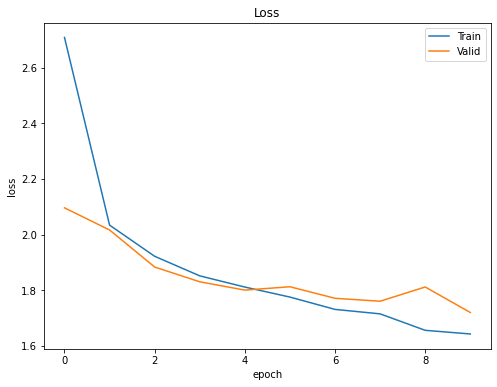

In [ ]:
# from elice_utils import EliceUtils

# elice_utils = EliceUtils()

import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

import tensorflow as tf
from tensorflow.keras import layers, Sequential, Input
from tensorflow.keras.optimizers import Adam

import numpy as np
import matplotlib.pyplot as plt

SEED = 2021

def load_cifar10_dataset():
    train_X = np.load(base_dir+"/data/2/dataset_cifar10_train_X.npy")
    train_y = np.load(base_dir+"/data/2/dataset_cifar10_train_y.npy")
    test_X = np.load(base_dir+"/data/2/dataset_cifar10_test_X.npy")
    test_y = np.load(base_dir+"/data/2/dataset_cifar10_test_y.npy")
    
    train_X, test_X = train_X / 255.0, test_X / 255.0
    
    return train_X, train_y, test_X, test_y

def build_mlp_model(img_shape, num_classes=10):
    model = Sequential()

    model.add(Input(shape=img_shape))
    
    # TODO: [지시사항 1번] 모델을 완성하세요.
    model.add(layers.Flatten())
    model.add(layers.Dense(4096, activation="relu"))
    model.add(layers.Dense(1024, activation="relu"))
    model.add(layers.Dense(256, activation="relu"))
    model.add(layers.Dense(64, activation="relu"))
    model.add(layers.Dense(num_classes, activation="softmax"))

    return model
    
def plot_history(hist):
    train_loss = hist.history["loss"]
    train_acc = hist.history["accuracy"]
    valid_loss = hist.history["val_loss"]
    valid_acc = hist.history["val_accuracy"]
    
    fig = plt.figure(figsize=(8, 6))
    plt.plot(train_loss)
    plt.plot(valid_loss)
    plt.title('Loss')
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.legend(['Train', 'Valid'], loc='upper right')
    plt.savefig("loss.png")
    print(plt)
    
    fig = plt.figure(figsize=(8, 6))
    plt.plot(train_acc)
    plt.plot(valid_acc)
    plt.title('Accuracy')
    plt.xlabel('epoch')
    plt.ylabel('accuracy')
    plt.legend(['Train', 'Valid'], loc='upper left')
    plt.savefig("accuracy.png")
    print(plt)

def main(model=None, epochs=10):
    tf.random.set_seed(SEED)
    np.random.seed(SEED)
    
    train_X, train_y, test_X, test_y = load_cifar10_dataset()
    img_shape = train_X[0].shape
    
    # TODO: [지시사항 2번] Adam optimizer를 설정하세요.
    optimizer = Adam(learning_rate=0.001)

    mlp_model = model
    if model is None:
        mlp_model = build_mlp_model(img_shape)
    
    # TODO: [지시사항 3번] 모델의 optimizer, 손실 함수, 평가 지표를 설정하세요.
    mlp_model.compile(optimizer=optimizer, loss="sparse_categorical_crossentropy", metrics=["accuracy"])
    
    # TODO: [지시사항 4번] 모델 학습을 위한 hyperparameter를 설정하세요.
    hist = mlp_model.fit(train_X, train_y, epochs=epochs, batch_size=64, validation_split=0.2, shuffle=True, verbose=2)
    
    plot_history(hist)
    test_loss, test_acc = mlp_model.evaluate(test_X, test_y)
    print("Test Loss: {:.5f}, Test Accuracy: {:.3f}%".format(test_loss, test_acc * 100))
    
    return optimizer, hist

if __name__ == "__main__":
    main()

#### Imdb 감성분석 - Vanilla RNN

In [ ]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

import tensorflow as tf
from tensorflow.keras import layers, Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences

def load_data(num_words, max_len):
    # imdb 데이터셋을 불러옵니다. 데이터셋에서 단어는 num_words 개를 가져옵니다.
    (X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=num_words)

    # 단어 개수가 다른 문장들을 Padding을 추가하여
    # 단어가 가장 많은 문장의 단어 개수로 통일합니다.
    X_train = pad_sequences(X_train, maxlen=max_len)
    X_test = pad_sequences(X_test, maxlen=max_len)
    
    return X_train, X_test, y_train, y_test

def build_rnn_model(num_words, embedding_len):
    model = Sequential()
    
    # TODO: [지시사항 1번] 지시사항에 따라 모델을 완성하세요.
    model.add(layers.Embedding(num_words, embedding_len))
    model.add(layers.SimpleRNN(16))
    model.add(layers.Dense(1, activation="sigmoid"))
    
    return model

def main(model=None, epochs=5):
    # IMDb 데이터셋에서 가져올 단어의 개수
    num_words = 6000
    
    # 각 문장이 가질 수 있는 최대 단어 개수
    max_len = 130
    
    # 임베딩 된 벡터의 길이
    embedding_len = 100
    
    # IMDb 데이터셋을 불러옵니다.
    X_train, X_test, y_train, y_test = load_data(num_words, max_len)
    
    if model is None:
        model = build_rnn_model(num_words, embedding_len)
    
    # TODO: [지시사항 2번] 모델 학습을 위한 optimizer와 loss 함수를 설정하세요.
    optimizer = Adam(learning_rate=0.001)
    model.compile(optimizer=optimizer, loss="binary_crossentropy", metrics=["accuracy"])
    
    # TODO: [지시사항 3번] 모델 학습을 위한 hyperparameter를 설정하세요.
    hist = model.fit(X_train, y_train, epochs=epochs, batch_size=100, validation_split=0.2, shuffle=True, verbose=2)
    
    # 모델을 테스트 데이터셋으로 테스트합니다.
    test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
    print()
    print("테스트 Loss: {:.5f}, 테스트 정확도: {:.3f}%".format(test_loss, test_acc * 100))
    
    return optimizer, hist

if __name__=="__main__":
    main()

Epoch 1/5
200/200 - 12s - loss: 0.5242 - accuracy: 0.7433 - val_loss: 0.4400 - val_accuracy: 0.8084 - 12s/epoch - 59ms/step
Epoch 2/5
200/200 - 9s - loss: 0.3400 - accuracy: 0.8634 - val_loss: 0.3998 - val_accuracy: 0.8312 - 9s/epoch - 45ms/step
Epoch 3/5
200/200 - 12s - loss: 0.2400 - accuracy: 0.9086 - val_loss: 0.3956 - val_accuracy: 0.8384 - 12s/epoch - 59ms/step
Epoch 4/5
200/200 - 12s - loss: 0.1589 - accuracy: 0.9463 - val_loss: 0.4250 - val_accuracy: 0.8332 - 12s/epoch - 58ms/step
Epoch 5/5
200/200 - 11s - loss: 0.1079 - accuracy: 0.9666 - val_loss: 0.4571 - val_accuracy: 0.8358 - 11s/epoch - 56ms/step

테스트 Loss: 0.46938, 테스트 정확도: 83.260%


#### 항공승객수예측 - 시계열 예측 - Vanilla RNN

Epoch 1/100
14/14 - 1s - loss: 2.4393 - 1s/epoch - 107ms/step
Epoch 2/100
14/14 - 0s - loss: 2.1860 - 51ms/epoch - 4ms/step
Epoch 3/100
14/14 - 0s - loss: 1.9517 - 41ms/epoch - 3ms/step
Epoch 4/100
14/14 - 0s - loss: 1.7368 - 45ms/epoch - 3ms/step
Epoch 5/100
14/14 - 0s - loss: 1.5558 - 63ms/epoch - 4ms/step
Epoch 6/100
14/14 - 0s - loss: 1.3931 - 66ms/epoch - 5ms/step
Epoch 7/100
14/14 - 0s - loss: 1.2433 - 72ms/epoch - 5ms/step
Epoch 8/100
14/14 - 0s - loss: 1.1124 - 60ms/epoch - 4ms/step
Epoch 9/100
14/14 - 0s - loss: 0.9942 - 62ms/epoch - 4ms/step
Epoch 10/100
14/14 - 0s - loss: 0.8949 - 55ms/epoch - 4ms/step
Epoch 11/100
14/14 - 0s - loss: 0.8020 - 51ms/epoch - 4ms/step
Epoch 12/100
14/14 - 0s - loss: 0.7219 - 54ms/epoch - 4ms/step
Epoch 13/100
14/14 - 0s - loss: 0.6512 - 53ms/epoch - 4ms/step
Epoch 14/100
14/14 - 0s - loss: 0.5870 - 46ms/epoch - 3ms/step
Epoch 15/100
14/14 - 0s - loss: 0.5323 - 58ms/epoch - 4ms/step
Epoch 16/100
14/14 - 0s - loss: 0.4811 - 55ms/epoch - 4ms/step
E

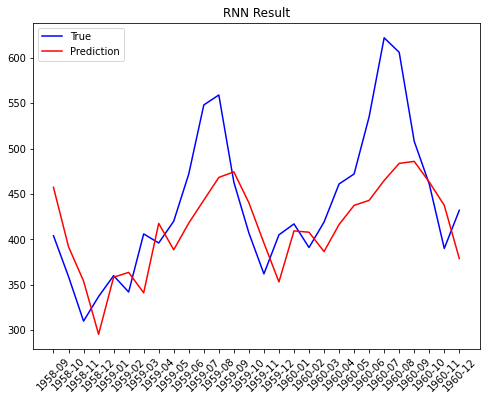

In [ ]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

import tensorflow as tf
from tensorflow.keras import layers, Sequential
from tensorflow.keras.optimizers import Adam

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def load_data(window_size):
    raw_data = pd.read_csv(base_dir+"/data/3/airline-passengers.csv")
    raw_passengers = raw_data["Passengers"].to_numpy()

    # 데이터의 평균과 표준편차 값으로 정규화(표준화) 합니다.
    mean_passenger = raw_passengers.mean()
    stdv_passenger = raw_passengers.std(ddof=0)
    raw_passengers = (raw_passengers - mean_passenger) / stdv_passenger
    data_stat = {"month": raw_data["Month"], "mean": mean_passenger, "stdv": stdv_passenger}

    # window_size 개의 데이터를 불러와 입력 데이터(X)로 설정하고
    # window_size보다 한 시점 뒤의 데이터를 예측할 대상(y)으로 설정하여
    # 데이터셋을 구성합니다.
    X, y = [], []
    for i in range(len(raw_passengers) - window_size):
        cur_passenger = raw_passengers[i:i + window_size]
        target = raw_passengers[i + window_size]

        X.append(list(cur_passenger))
        y.append(target)

    # X와 y를 numpy array로 변환합니다.
    X = np.array(X)
    y = np.array(y)

    # 각 입력 데이터는 sequence 길이가 window_size이고, featuer 개수는 1개가 되도록
    # 마지막에 새로운 차원을 추가합니다.
    # 즉, (전체 데이터 개수, window_size) -> (전체 데이터 개수, window_size, 1)이 되도록 변환합니다.
    X = X[:, :, np.newaxis]

    # 학습 데이터는 전체 데이터의 80%, 테스트 데이터는 20%로 설정합니다.
    total_len = len(X)
    train_len = int(total_len * 0.8)

    X_train, y_train = X[:train_len], y[:train_len]
    X_test, y_test = X[train_len:], y[train_len:]

    return X_train, X_test, y_train, y_test, data_stat

def build_rnn_model(window_size):
    model = Sequential()

    # TODO: [지시사항 1번] SimpleRNN 기반 모델을 구성하세요.
    model.add(layers.SimpleRNN(4, input_shape=(window_size, 1)))
    model.add(layers.Dense(1)) 

    return model
    
def plot_result(X_true, y_true, y_pred, data_stat):
    # 표준화된 결과를 다시 원래 값으로 변환합니다.
    y_true_orig = (y_true * data_stat["stdv"]) + data_stat["mean"]
    y_pred_orig = (y_pred * data_stat["stdv"]) + data_stat["mean"]

    # 테스트 데이터에서 사용한 날짜들만 가져옵니다.
    test_month = data_stat["month"][-len(y_true):]

    # 모델의 예측값을 실제값과 함께 그래프로 그립니다.
    fig = plt.figure(figsize=(8, 6))
    ax = plt.gca()
    ax.plot(y_true_orig, color="b", label="True")
    ax.plot(y_pred_orig, color="r", label="Prediction")
    ax.set_xticks(list(range(len(test_month))))
    ax.set_xticklabels(test_month, rotation=45)
    ax.set_title("RNN Result")
    ax.legend(loc="upper left")
    plt.savefig("airline_rnn.png")
    print(plt)

def main(model=None, epochs=10):
    tf.random.set_seed(2022)

    window_size = 4
    X_train, X_test, y_train, y_test, data_stat = load_data(window_size)

    if model is None:
        model = build_rnn_model(window_size)

    # TODO: [지시사항 2번] 모델 학습을 위한 optimizer와 loss 함수를 설정하세요.
    optimizer = Adam(learning_rate=0.001)
    model.compile(optimizer=optimizer, loss="mse")

    # TODO: [지시사항 3번] 모델 학습을 위한 hyperparameter를 설정하세요.
    hist = model.fit(X_train, y_train, batch_size=8, epochs=epochs, shuffle=True, verbose=2)
    
    # 테스트 데이터셋으로 모델을 테스트합니다.
    test_loss = model.evaluate(X_test, y_test, verbose=0)
    print()
    print("테스트 MSE: {:.5f}".format(test_loss))
    print()
    
    # 모델의 예측값과 실제값을 그래프로 그립니다.
    y_pred = model.predict(X_test)
    plot_result(X_test, y_test, y_pred, data_stat)

    return optimizer, hist

if __name__ == "__main__":
    main(epochs=100)

#### Imdb 리뷰 긍정/부정 - LSTM

In [ ]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

import tensorflow as tf
from tensorflow.keras import layers, Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences

def load_data(num_words, max_len):
    # TODO: [지시사항 1번] IMDB 데이터셋을 불러오세요.
    (X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=num_words)
    X_train = pad_sequences(X_train, maxlen=max_len)
    X_test = pad_sequences(X_test, maxlen=max_len)

    return X_train, X_test, y_train, y_test

def build_lstm_model(num_words, embedding_len):
    model = Sequential()

    # TODO: [지시사항 2번] LSTM 기반 모델을 구성하세요.
    model.add(layers.Embedding(num_words, embedding_len))
    model.add(layers.LSTM(16))
    model.add(layers.Dense(1, activation="sigmoid"))

    return model
    
def run_model(model, X_train, X_test, y_train, y_test, epochs=5):
    # TODO: [지시사항 3번] 모델 학습을 위한 optimizer, loss 함수, 평가 지표를 설정하세요.
    optimizer = Adam(learning_rate=0.001)
    model.compile(optimizer=optimizer, loss="binary_crossentropy", metrics=["accuracy"])
    
    # TODO: [지시사항 4번] 모델 학습을 위한 hyperparameter를 설정하세요.
    hist = model.fit(X_train, y_train, batch_size=128, epochs=epochs, shuffle=True, verbose=2)
    
    # 모델을 테스트 데이터셋으로 테스트합니다.
    test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
    print()
    print("테스트 loss: {:.5f}, 테스트 정확도: {:.3f}%".format(test_loss, test_acc * 100))
    
    return optimizer, hist

def main():
    tf.random.set_seed(2022)

    num_words = 6000
    max_len =  130
    embedding_len = 100

    X_train, X_test, y_train, y_test = load_data(num_words, max_len)

    model = build_lstm_model(num_words, embedding_len)
    run_model(model, X_train, X_test, y_train, y_test)

if __name__ == "__main__":
    main()


Epoch 1/5
196/196 - 28s - loss: 0.4776 - accuracy: 0.7754 - 28s/epoch - 143ms/step
Epoch 2/5
196/196 - 34s - loss: 0.2893 - accuracy: 0.8848 - 34s/epoch - 172ms/step
Epoch 3/5
196/196 - 34s - loss: 0.2269 - accuracy: 0.9138 - 34s/epoch - 175ms/step
Epoch 4/5
196/196 - 29s - loss: 0.1895 - accuracy: 0.9320 - 29s/epoch - 150ms/step
Epoch 5/5
196/196 - 22s - loss: 0.1563 - accuracy: 0.9450 - 22s/epoch - 114ms/step

테스트 loss: 0.42627, 테스트 정확도: 84.728%


#### 항공승객수예측 - 시계열 예측 - GRU

Epoch 1/100
14/14 - 4s - loss: 0.7143 - 4s/epoch - 282ms/step
Epoch 2/100
14/14 - 0s - loss: 0.5970 - 61ms/epoch - 4ms/step
Epoch 3/100
14/14 - 0s - loss: 0.5057 - 52ms/epoch - 4ms/step
Epoch 4/100
14/14 - 0s - loss: 0.4368 - 52ms/epoch - 4ms/step
Epoch 5/100
14/14 - 0s - loss: 0.3865 - 52ms/epoch - 4ms/step
Epoch 6/100
14/14 - 0s - loss: 0.3456 - 54ms/epoch - 4ms/step
Epoch 7/100
14/14 - 0s - loss: 0.3119 - 62ms/epoch - 4ms/step
Epoch 8/100
14/14 - 0s - loss: 0.2802 - 50ms/epoch - 4ms/step
Epoch 9/100
14/14 - 0s - loss: 0.2539 - 57ms/epoch - 4ms/step
Epoch 10/100
14/14 - 0s - loss: 0.2294 - 58ms/epoch - 4ms/step
Epoch 11/100
14/14 - 0s - loss: 0.2083 - 56ms/epoch - 4ms/step
Epoch 12/100
14/14 - 0s - loss: 0.1894 - 49ms/epoch - 4ms/step
Epoch 13/100
14/14 - 0s - loss: 0.1718 - 58ms/epoch - 4ms/step
Epoch 14/100
14/14 - 0s - loss: 0.1563 - 50ms/epoch - 4ms/step
Epoch 15/100
14/14 - 0s - loss: 0.1442 - 46ms/epoch - 3ms/step
Epoch 16/100
14/14 - 0s - loss: 0.1331 - 66ms/epoch - 5ms/step
E

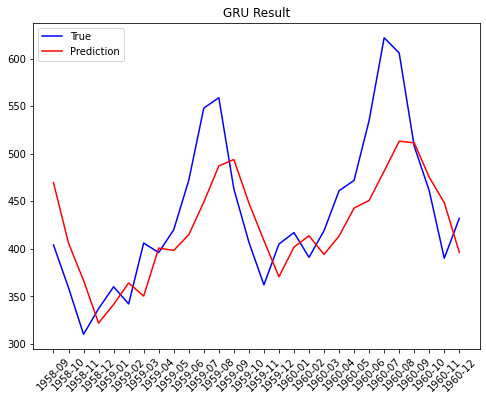

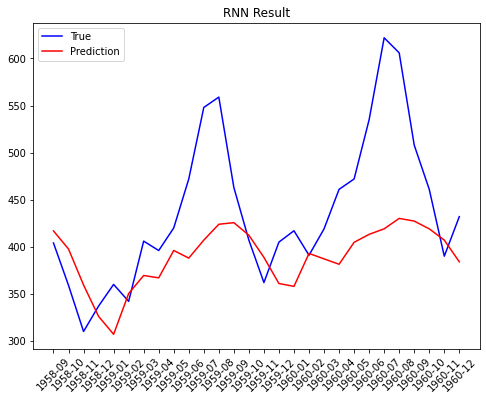

In [ ]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

import tensorflow as tf
from tensorflow.keras import layers, Sequential
from tensorflow.keras.optimizers import Adam

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def load_data(window_size):
    raw_data = pd.read_csv(base_dir + "/data/3/airline-passengers.csv")
    raw_passengers = raw_data["Passengers"].to_numpy()

    # 데이터의 평균과 표준편차 값으로 정규화(표준화) 합니다.
    mean_passenger = raw_passengers.mean()
    stdv_passenger = raw_passengers.std(ddof=0)
    raw_passengers = (raw_passengers - mean_passenger) / stdv_passenger
    plot_data = {"month": raw_data["Month"], "mean": mean_passenger, "stdv": stdv_passenger}

    # window_size 개의 데이터를 불러와 입력 데이터(X)로 설정하고
    # window_size보다 한 시점 뒤의 데이터를 예측할 대상(y)으로 설정하여
    # 데이터셋을 구성합니다.
    X, y = [], []
    for i in range(len(raw_passengers) - window_size):
        cur_passenger = raw_passengers[i:i + window_size]
        target = raw_passengers[i + window_size]

        X.append(list(cur_passenger))
        y.append(target)

    # X와 y를 numpy array로 변환합니다.
    X = np.array(X)
    y = np.array(y)

    # 각 입력 데이터는 sequence 길이가 window_size이고, featuer 개수는 1개가 되도록
    # 마지막에 새로운 차원을 추가합니다.
    # 즉, (전체 데이터 개수, window_size) -> (전체 데이터 개수, window_size, 1)이 되도록 변환합니다.
    X = X[:, :, np.newaxis]

    # 학습 데이터는 전체 데이터의 80%, 테스트 데이터는 20%로 설정합니다.
    total_len = len(X)
    train_len = int(total_len * 0.8)

    X_train, y_train = X[:train_len], y[:train_len]
    X_test, y_test = X[train_len:], y[train_len:]

    return X_train, X_test, y_train, y_test, plot_data

def build_gru_model(window_size):
    model = Sequential()

    # TODO: [지시사항 1번] GRU 기반 모델을 구성하세요.
    model.add(layers.GRU(4, input_shape=(window_size, 1)))
    model.add(layers.Dense(1))

    return model

def build_rnn_model(window_size):
    model = Sequential()

    # TODO: [지시사항 2번] SimpleRNN 기반 모델을 구성하세요.
    model.add(layers.SimpleRNN(4, input_shape=(window_size, 1)))
    model.add(layers.Dense(1))

    return model

def run_model(model, X_train, X_test, y_train, y_test, epochs=100, name=None):
    # TODO: [지시사항 3번] 모델 학습을 위한 optimizer와 loss 함수를 설정하세요.
    optimizer = Adam(learning_rate=0.001)
    model.compile(optimizer=optimizer, loss="mse")

    # TODO: [지시사항 4번] 모델 학습을 위한 hyperparameter를 설정하세요.
    hist = model.fit(X_train, y_train, epochs=epochs, batch_size=8, shuffle=True, verbose=2)

    # 테스트 데이터셋으로 모델을 테스트합니다.
    test_loss = model.evaluate(X_test, y_test, verbose=0)
    print()
    print("테스트 MSE: {:.5f}".format(test_loss))
    print()

    return optimizer, hist
    
def plot_result(model, X_true, y_true, plot_data, name):
    y_pred = model.predict(X_true)

    # 표준화된 결과를 다시 원래 값으로 변환합니다.
    y_true_orig = (y_true * plot_data["stdv"]) + plot_data["mean"]
    y_pred_orig = (y_pred * plot_data["stdv"]) + plot_data["mean"]

    # 테스트 데이터에서 사용한 날짜들만 가져옵니다.
    test_month = plot_data["month"][-len(y_true):]

    # 모델의 예측값을 실제값과 함께 그래프로 그립니다.
    fig = plt.figure(figsize=(8, 6))
    ax = plt.gca()
    ax.plot(y_true_orig, color="b", label="True")
    ax.plot(y_pred_orig, color="r", label="Prediction")
    ax.set_xticks(list(range(len(test_month))))
    ax.set_xticklabels(test_month, rotation=45)
    ax.set_title("{} Result".format(name))
    ax.legend(loc="upper left")
    plt.savefig("airline_{}.png".format(name.lower()))
    print(plt)

def main():
    tf.random.set_seed(2022)

    window_size = 4
    X_train, X_test, y_train, y_test, plot_data = load_data(window_size)

    gru_model = build_gru_model(window_size)
    run_model(gru_model, X_train, X_test, y_train, y_test, name="GRU")
    plot_result(gru_model, X_test, y_test, plot_data, name="GRU")

    rnn_model = build_rnn_model(window_size)
    run_model(rnn_model, X_train, X_test, y_train, y_test, name="RNN")
    plot_result(rnn_model, X_test, y_test, plot_data, name="RNN")
    


if __name__ == "__main__":
    main()

#### 식품리뷰 분류 - RNN

In [ ]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

import tensorflow as tf
from tensorflow.keras import layers, Sequential
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split

import pandas as pd

def load_data(max_len):
    data = pd.read_csv(base_dir + "/data/4/review_score.csv")
    # 리뷰 문장을 입력 데이터로, 해당 리뷰의 평점을 라벨 데이터로 설정합니다.
    X = data['Review']
    y = data['Score']
    y = y - 1 # 값을 1~5에서 0~4로 변경

    # 문장 내 각 단어를 숫자로 변환하는 Tokenizer를 적용합니다.
    tokenizer = Tokenizer()
    tokenizer.fit_on_texts(X)
    X = tokenizer.texts_to_sequences(X)

    # 전체 단어 중에서 가장 큰 숫자로 mapping된 단어의 숫자를 가져옵니다.
    # 즉, max_features는 전체 데이터셋에 등장하는 겹치지 않는 단어의 개수 + 1과 동일합니다.
    max_features = max([max(_in) for _in in X]) + 1

    # 불러온 데이터셋을 학습 데이터 80%, 테스트 데이터 20%로 분리합니다.
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

    # 모든 문장들을 가장 긴 문장의 단어 개수가 되게 padding을 추가합니다.
    X_train = pad_sequences(X_train, maxlen=max_len)
    X_test = pad_sequences(X_test, maxlen=max_len)

    return X_train, X_test, y_train, y_test, max_features

def build_rnn_model(max_features, embedding_size):
    model = Sequential()

    # TODO: [지시사항 1번] Simple RNN 기반의 모델을 완성하세요.
    model.add(layers.Embedding(max_features, embedding_size))
    model.add(layers.SimpleRNN(20))
    model.add(layers.Dense(5, activation="softmax"))

    return model

def build_lstm_model(max_features, embedding_size):
    model = Sequential()

    # TODO: [지시사항 2번] LSTM 기반의 모델을 완성하세요.
    model.add(layers.Embedding(max_features, embedding_size))
    model.add(layers.LSTM(20))
    model.add(layers.Dense(5, activation="softmax"))

    return model

def build_gru_model(max_features, embedding_size):
    model = Sequential()

    # TODO: [지시사항 3번] GRU 기반의 모델을 완성하세요.
    model.add(layers.Embedding(max_features, embedding_size))
    model.add(layers.GRU(20))
    model.add(layers.Dense(5, activation="softmax"))

    return model

def run_model(model, X_train, X_test, y_train, y_test, epochs=10):
    # TODO: [지시사항 4번] 모델 학습을 위한 optimizer, loss 함수, 평가 지표를 설정하세요.
    optimizer = Adam(learning_rate=0.001)
    model.compile(optimizer=optimizer, loss="sparse_categorical_crossentropy", metrics=["accuracy"])

    # TODO: [지시사항 5번] 모델 학습을 위한 hyperparameter를 설정하세요.
    hist = model.fit(X_train, y_train, batch_size=256, epochs=epochs, shuffle=True, verbose=2)
    test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)

    return test_loss, test_acc, optimizer, hist

def main():
    tf.random.set_seed(2022)
    max_len = 150
    embedding_size = 128

    X_train, X_test, y_train, y_test, max_features = load_data(max_len)
    rnn_model = build_rnn_model(max_features, embedding_size)
    lstm_model = build_lstm_model(max_features, embedding_size)
    gru_model = build_gru_model(max_features, embedding_size)

    rnn_test_loss, rnn_test_acc, _, _ = run_model(rnn_model, X_train, X_test, y_train, y_test)
    lstm_test_loss, lstm_test_acc, _, _ = run_model(lstm_model, X_train, X_test, y_train, y_test)
    gru_test_loss, gru_test_acc, _, _ = run_model(gru_model, X_train, X_test, y_train, y_test)

    print()
    print("=" * 20, "모델 별 Test Loss와 정확도", "=" * 20)
    print("[RNN ] 테스트 Loss: {:.5f}, 테스트 Accuracy: {:.3f}%".format(rnn_test_loss, rnn_test_acc * 100))
    print("[LSTM] 테스트 Loss: {:.5f}, 테스트 Accuracy: {:.3f}%".format(lstm_test_loss, lstm_test_acc * 100))
    print("[GRU ] 테스트 Loss: {:.5f}, 테스트 Accuracy: {:.3f}%".format(gru_test_loss, gru_test_acc * 100))

if __name__ == "__main__":
    main()

Epoch 1/10
157/157 - 33s - loss: 1.0904 - accuracy: 0.6291 - 33s/epoch - 212ms/step
Epoch 2/10
157/157 - 44s - loss: 0.8285 - accuracy: 0.6898 - 44s/epoch - 283ms/step
Epoch 3/10
157/157 - 40s - loss: 0.6797 - accuracy: 0.7541 - 40s/epoch - 256ms/step
Epoch 4/10
157/157 - 27s - loss: 0.5407 - accuracy: 0.8191 - 27s/epoch - 171ms/step
Epoch 5/10
157/157 - 31s - loss: 0.4079 - accuracy: 0.8745 - 31s/epoch - 196ms/step
Epoch 6/10
157/157 - 27s - loss: 0.3052 - accuracy: 0.9129 - 27s/epoch - 173ms/step
Epoch 7/10
157/157 - 44s - loss: 0.2175 - accuracy: 0.9427 - 44s/epoch - 279ms/step
Epoch 8/10
157/157 - 37s - loss: 0.1686 - accuracy: 0.9583 - 37s/epoch - 233ms/step
Epoch 9/10
157/157 - 36s - loss: 0.1297 - accuracy: 0.9700 - 36s/epoch - 231ms/step
Epoch 10/10
157/157 - 28s - loss: 0.0948 - accuracy: 0.9798 - 28s/epoch - 180ms/step
Epoch 1/10
157/157 - 53s - loss: 1.1287 - accuracy: 0.6185 - 53s/epoch - 335ms/step
Epoch 2/10
157/157 - 53s - loss: 0.8940 - accuracy: 0.6687 - 53s/epoch - 33

#### 주가분석 - RNN

Epoch 1/10
62/62 - 4s - loss: 0.0148 - 4s/epoch - 70ms/step
Epoch 2/10
62/62 - 3s - loss: 1.3368e-04 - 3s/epoch - 53ms/step
Epoch 3/10
62/62 - 3s - loss: 1.1182e-04 - 3s/epoch - 54ms/step
Epoch 4/10
62/62 - 4s - loss: 6.0587e-04 - 4s/epoch - 59ms/step
Epoch 5/10
62/62 - 4s - loss: 1.0999e-04 - 4s/epoch - 60ms/step
Epoch 6/10
62/62 - 4s - loss: 1.3332e-04 - 4s/epoch - 62ms/step
Epoch 7/10
62/62 - 4s - loss: 1.0889e-04 - 4s/epoch - 60ms/step
Epoch 8/10
62/62 - 4s - loss: 1.1282e-04 - 4s/epoch - 65ms/step
Epoch 9/10
62/62 - 4s - loss: 2.0012e-04 - 4s/epoch - 60ms/step
Epoch 10/10
62/62 - 4s - loss: 1.0338e-04 - 4s/epoch - 62ms/step
[RNN] 테스트 loss: 0.91680

Epoch 1/10
62/62 - 20s - loss: 0.0135 - 20s/epoch - 318ms/step
Epoch 2/10
62/62 - 14s - loss: 1.2850e-04 - 14s/epoch - 227ms/step
Epoch 3/10
62/62 - 22s - loss: 8.2033e-05 - 22s/epoch - 353ms/step
Epoch 4/10
62/62 - 21s - loss: 8.0055e-05 - 21s/epoch - 337ms/step
Epoch 5/10
62/62 - 18s - loss: 7.1601e-05 - 18s/epoch - 292ms/step
Epoch 6

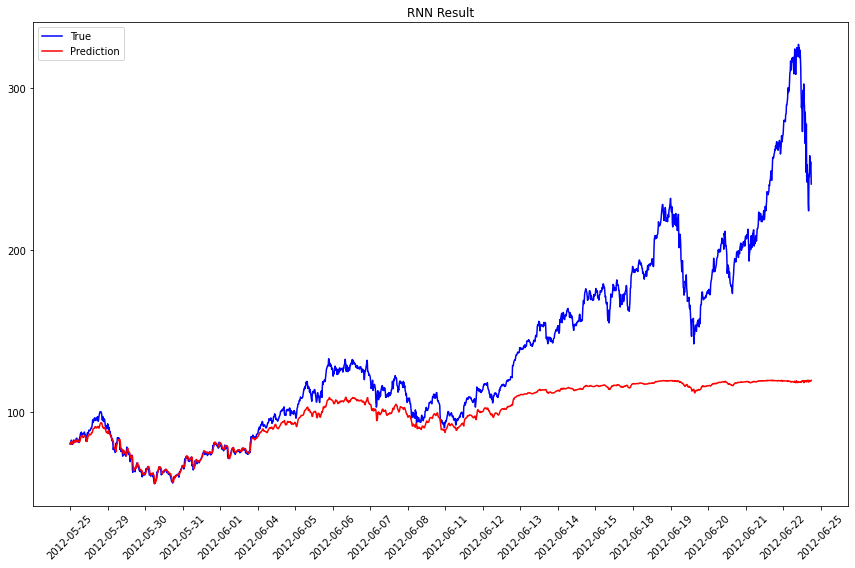

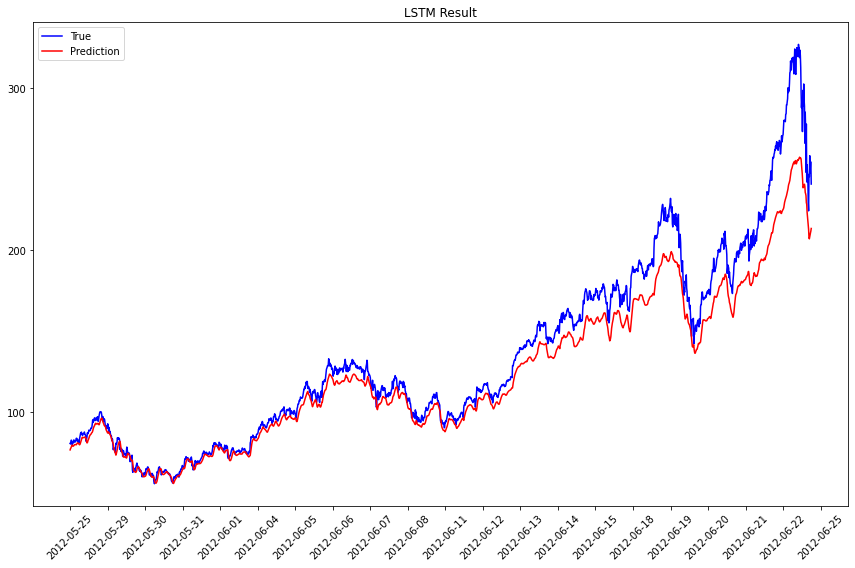

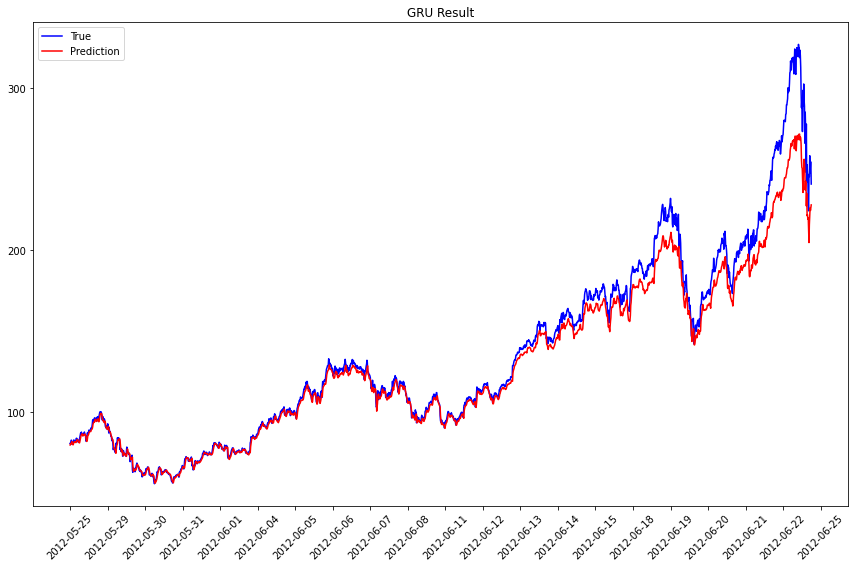

In [ ]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

import tensorflow as tf
from tensorflow.keras import layers, Sequential
from tensorflow.keras.optimizers import Adam

from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

def load_data(window_size):
    raw_data_df = pd.read_csv(base_dir + "/data/5/AAPL.csv", index_col="Date")
    
    # 데이터 전체를 표준화합니다.
    scaler = StandardScaler()
    raw_data = scaler.fit_transform(raw_data_df)
    plot_data = {"mean": scaler.mean_[3], "var": scaler.var_[3], "date": raw_data_df.index}

    # 입력 데이터(X)는 시작가, 일 최고가, 일 최저가, 종가 데이터를 사용하고
    # 라벨 데이터(y)는 4번째 컬럼에 해당하는 종가 데이터만 사용합니다.
    raw_X = raw_data[:, :4]
    raw_y = raw_data[:, 3]

    # window_size 개의 데이터를 불러와 입력 데이터(X)로 설정하고
    # window_size보다 한 시점 뒤의 데이터를 예측할 대상(y)으로 설정하여
    # 데이터셋을 구성합니다.
    X, y = [], []
    for i in range(len(raw_X) - window_size):
        cur_prices = raw_X[i:i + window_size, :]
        target = raw_y[i + window_size]

        X.append(list(cur_prices))
        y.append(target)

    # X와 y를 numpy array로 변환합니다.
    X = np.array(X)
    y = np.array(y)

    # 학습 데이터는 전체 데이터의 80%, 테스트 데이터는 20%로 설정합니다.
    total_len = len(X)
    train_len = int(total_len * 0.8)

    X_train, y_train = X[:train_len], y[:train_len]
    X_test, y_test = X[train_len:], y[train_len:]

    return X_train, X_test, y_train, y_test, plot_data

def build_rnn_model(window_size, num_features):
    model = Sequential()

    # TODO: [지시사항 1번] SimpleRNN 기반 모델을 구성하세요.
    model.add(layers.SimpleRNN(256, input_shape=(window_size, num_features)))
    model.add(layers.Dense(64, activation="relu"))
    model.add(layers.Dense(16, activation="relu"))
    model.add(layers.Dense(1))


    return model

def build_lstm_model(window_size, num_features):
    model = Sequential()

    # TODO: [지시사항 2번] LSTM 기반 모델을 구성하세요.
    model.add(layers.LSTM(256, input_shape=(window_size, num_features)))
    model.add(layers.Dense(64, activation="relu"))
    model.add(layers.Dense(16, activation="relu"))
    model.add(layers.Dense(1))

    return model

def build_gru_model(window_size, num_features):
    model = Sequential()

    # TODO: [지시사항 3번] GRU 기반 모델을 구성하세요.
    model.add(layers.GRU(256, input_shape=(window_size, num_features)))
    model.add(layers.Dense(64, activation="relu"))
    model.add(layers.Dense(16, activation="relu"))
    model.add(layers.Dense(1))

    return model

def run_model(model, X_train, X_test, y_train, y_test, epochs=10, name=None):
    # TODO: [지시사항 4번] 모델 학습을 위한 optimizer와 loss 함수를 설정하세요.
    optimizer = Adam(learning_rate=0.001)
    model.compile(optimizer=optimizer, loss="mse")

    # TODO: [지시사항 5번] 모델 학습을 위한 hyperparameter를 설정하세요.
    hist = model.fit(X_train, y_train, epochs=epochs, batch_size=128, shuffle=True, verbose=2)
    
    # 테스트 데이터셋으로 모델을 테스트합니다.
    test_loss = model.evaluate(X_test, y_test, verbose=0)
    print("[{}] 테스트 loss: {:.5f}".format(name, test_loss))
    print()

    return optimizer, hist

def plot_result(model, X_true, y_true, plot_data, name):
    y_pred = model.predict(X_true)

    # 표준화된 결과를 다시 원래 값으로 변환합니다.
    y_true_orig = (y_true * np.sqrt(plot_data["var"])) + plot_data["mean"]
    y_pred_orig = (y_pred * np.sqrt(plot_data["var"])) + plot_data["mean"]

    # 테스트 데이터에서 사용한 날짜들만 가져옵니다.
    test_date = plot_data["date"][-len(y_true):]

    # 모델의 예측값을 실제값과 함께 그래프로 그립니다.
    fig = plt.figure(figsize=(12, 8))
    ax = plt.gca()
    ax.plot(y_true_orig, color="b", label="True")
    ax.plot(y_pred_orig, color="r", label="Prediction")
    ax.set_xticks(list(range(len(test_date))))
    ax.set_xticklabels(test_date, rotation=45)
    ax.xaxis.set_major_locator(ticker.MultipleLocator(100))
    ax.yaxis.set_major_locator(ticker.MultipleLocator(100))
    ax.set_title("{} Result".format(name))
    ax.legend(loc="upper left")
    plt.tight_layout()
    plt.savefig("apple_stock_{}".format(name.lower()))
    print(plt)
    

def main():
    tf.random.set_seed(2022)

    window_size = 30
    X_train, X_test, y_train, y_test, plot_data = load_data(window_size)
    num_features = X_train[0].shape[1]

    rnn_model = build_rnn_model(window_size, num_features)
    lstm_model = build_lstm_model(window_size, num_features)
    gru_model = build_gru_model(window_size, num_features)

    run_model(rnn_model, X_train, X_test, y_train, y_test, name="RNN")
    run_model(lstm_model, X_train, X_test, y_train, y_test, name="LSTM")
    run_model(gru_model, X_train, X_test, y_train, y_test, name="GRU")

    plot_result(rnn_model, X_test, y_test, plot_data, name="RNN")
    plot_result(lstm_model, X_test, y_test, plot_data, name="LSTM")
    plot_result(gru_model, X_test, y_test, plot_data, name="GRU")

if __name__ == "__main__":
    main()

## MLOps

#### 내장콜백함수 - 과적합방지(EarlyStopping) / 모델저장(ModelCheckpoint)

In [ ]:
import os

import tensorflow as tf
from tensorflow.keras import layers, Sequential, Input
from tensorflow.keras.optimizers import Adam

import numpy as np
import matplotlib.pyplot as plt

SEED = 2021

def load_cifar10_dataset():
    train_X = np.load(base_dir+"/data/2/dataset_cifar10_train_X.npy")
    train_y = np.load(base_dir+"/data/2/dataset_cifar10_train_y.npy")
    test_X = np.load(base_dir+"/data/2/dataset_cifar10_test_X.npy")
    test_y = np.load(base_dir+"/data/2/dataset_cifar10_test_y.npy")
    
    train_X, test_X = train_X / 255.0, test_X / 255.0
    
    return train_X, train_y, test_X, test_y

def build_mlp_model(img_shape, num_classes=10):
    model = Sequential()
    model.add(Input(shape=img_shape))
    model.add(layers.Flatten())
    model.add(layers.Dense(2048, activation="relu"))
    model.add(layers.Dense(1024, activation="relu"))
    model.add(layers.Dense(256, activation="relu"))
    model.add(layers.Dense(64, activation="relu"))
    model.add(layers.Dense(num_classes, activation="softmax"))
    return model

# EarlyStopping 콜백함수의 인스턴스를 cb_earlystop에 저장합니다.
# TODO: 지시사항 1을 참고하여 매개변수를 설정하세요
cb_earlystop = tf.keras.callbacks.EarlyStopping( monitor = 'val_loss' , 
                                                 mode = 'auto',
                                                 verbose = 1,
                                                 patience = 2 )
                                                 
# ModelCheckpoint 콜백함수의 인스턴스를 cb_chkpnt 저장합니다.
# TODO: 지시사항 2을 참고하여 매개변수를 설정하세요
cb_chkpnt = tf.keras.callbacks.ModelCheckpoint( filepath = './chkpnt/{epoch:04d}.ckpt', 
                                             monitor = 'val_loss',
                                             mode = 'auto',  
                                             verbose = 1, 
                                             save_best_only = True,
                                             save_weights_only = False,
                                             save_freq = 'epoch' )

def main(epochs=10):
    tf.random.set_seed(SEED)
    np.random.seed(SEED)
    
    train_X, train_y, test_X, test_y = load_cifar10_dataset()
    img_shape = train_X[0].shape

    print(img_shape)

    optimizer = Adam(learning_rate=1e-3)

    mlp_model = build_mlp_model(img_shape)
    
    mlp_model.compile(optimizer=optimizer, loss="sparse_categorical_crossentropy", metrics=["accuracy"])

    hist = mlp_model.fit(train_X, train_y, epochs=epochs, batch_size=64, validation_split=0.2, shuffle=True, verbose=1, callbacks=[cb_earlystop, cb_chkpnt])
    # TODO: cb_earlystop와 cb_chkpnt를 리스트로 묶어 fit 함수의 callbacks 매개변수로 전달하세요.

    return optimizer, hist

if __name__ == "__main__":
    main()

(32, 32, 3)
Epoch 1/10
94/94 [==============================] - ETA: 0s - loss: 2.2589 - accuracy: 0.2013
Epoch 1: val_loss improved from inf to 1.95140, saving model to ./chkpnt/0001.ckpt
94/94 [==============================] - 16s 146ms/step - loss: 2.2589 - accuracy: 0.2013 - val_loss: 1.9514 - val_accuracy: 0.2767
Epoch 2/10
94/94 [==============================] - ETA: 0s - loss: 1.9486 - accuracy: 0.2798
Epoch 2: val_loss improved from 1.95140 to 1.93868, saving model to ./chkpnt/0002.ckpt
94/94 [==============================] - 13s 137ms/step - loss: 1.9486 - accuracy: 0.2798 - val_loss: 1.9387 - val_accuracy: 0.2867
Epoch 3/10
94/94 [==============================] - ETA: 0s - loss: 1.8993 - accuracy: 0.3080
Epoch 3: val_loss improved from 1.93868 to 1.84958, saving model to ./chkpnt/0003.ckpt
94/94 [==============================] - 17s 181ms/step - loss: 1.8993 - accuracy: 0.3080 - val_loss: 1.8496 - val_accuracy: 0.3233
Epoch 4/10
94/94 [==============================] - E

#### 텐서보드

In [ ]:
import tensorflow as tf
import numpy as np
from tensorflow.keras import layers


np.random.seed(100)
def generate_data(batch_size, n_steps):
    freq1, freq2, offsets1, offsets2 = np.random.rand(4,batch_size,1)
    time = np.linspace(0, 1, n_steps)
    series = 0.5 * np.sin((time - offsets1)*(freq1 * 10 + 10))
    series += 0.1 * np.sin((time - offsets2)*(freq2 * 10 + 10))
    series += 0.1 * (np.random.rand(batch_size,n_steps) - 0.5)
    return series[...,np.newaxis].astype(np.float32)

def make_model(n_step):
    model = tf.keras.models.Sequential()

    model.add(layers.SimpleRNN(20, return_sequences = True, input_shape = [None, 1])) 
    model.add(layers.SimpleRNN(20))
    model.add(layers.Dense(1))

    model.compile(optimizer = 'adam', loss = 'mse')
    return model

n_step = 50
series = generate_data(10000, n_step +1)
x_train, y_train = series[:7000, :n_step],series[:7000,-1]
x_val, y_val = series[7000:9000, :n_step],series[7000:9000,-1]
x_test, y_test = series[9000:, :n_step],series[9000:,-1]

# TODO: 텐서보드 콜백함수를 정의하여 tb에 저장하세요
tb = tf.keras.callbacks.TensorBoard(log_dir="logs")

e = 20 #제거 혹은 변경 금지
def main():        
    deep_rnn = make_model(n_step)
    hist=deep_rnn.fit(
    x=x_train, y=y_train, epochs=e,
    validation_data=(x_val, y_val),validation_freq=2,callbacks=[tb]) # TODO: 정의한 콜백함수를 리스트로 묶어 전달하세요
if __name__ == "__main__":
    main()

Epoch 1/20
219/219 [==============================] - 8s 22ms/step - loss: 0.0179
Epoch 2/20
219/219 [==============================] - 7s 31ms/step - loss: 0.0029 - val_loss: 0.0024
Epoch 3/20
219/219 [==============================] - 5s 23ms/step - loss: 0.0022
Epoch 4/20
219/219 [==============================] - 5s 24ms/step - loss: 0.0020 - val_loss: 0.0018
Epoch 5/20
219/219 [==============================] - 5s 22ms/step - loss: 0.0019
Epoch 6/20
219/219 [==============================] - 5s 25ms/step - loss: 0.0018 - val_loss: 0.0017
Epoch 7/20
219/219 [==============================] - 5s 24ms/step - loss: 0.0017
Epoch 8/20
219/219 [==============================] - 6s 26ms/step - loss: 0.0018 - val_loss: 0.0018
Epoch 9/20
219/219 [==============================] - 5s 22ms/step - loss: 0.0017
Epoch 10/20
219/219 [==============================] - 9s 43ms/step - loss: 0.0017 - val_loss: 0.0016
Epoch 11/20
219/219 [==============================] - 5s 24ms/step - loss: 0.0017
E

#### 모델 저장 / 불러오기

In [ ]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

import tensorflow as tf
from tensorflow.keras import layers, models, Sequential
from tensorflow.keras.datasets import mnist
import numpy as np

def load_data():
    (X_train, y_train), (X_test, y_test) = mnist.load_data()
    
    X_train, X_test = X_train / 255.0, X_test / 255.0
    
    X_train = np.expand_dims(X_train, axis=-1)
    X_test = np.expand_dims(X_test, axis=-1)
    
    return X_train, X_test, y_train, y_test

def build_model(input_shape, num_classes=10):
    model = Sequential()
    
    model.add(layers.Conv2D(16, kernel_size=(3, 3), padding="same", activation="relu", input_shape=input_shape))
    model.add(layers.MaxPool2D(2))
    
    model.add(layers.Conv2D(32, kernel_size=(3, 3), padding="same", activation="relu"))
    model.add(layers.MaxPool2D(2))
    
    model.add(layers.Flatten())
    model.add(layers.Dense(num_classes, activation="softmax"))
    
    return model

def main():
    X_train, X_test, y_train, y_test = load_data()
    
    model = build_model(X_train[0].shape)
    
    model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
    model.fit(X_train, y_train, epochs=1, batch_size=64, shuffle=True, verbose=2)
    
    # TODO: H5 형식으로 모델 저장
    model.save('h5_model.h5')
    
    # TODO: SavedModel 형식으로 모델 저장
    model.save('saved_model')

    print("학습하던 모델을 불러옵니다.")
    # TODO: 지시사항을 보고 학습한 SavedModel 형식 모델을 불러오세요 
    loaded_model = tf.keras.models.load_model("./saved_model")
    loaded_model.summary()

    # TODO: 지시사항을 보고 5번째 체크 포인트를 불러오세요
    # loaded_ckpt = tf.keras.models.load_model("./checkpoints/cp-0005.ckpt")
    # loaded_ckpt.summary()


if __name__ == "__main__":
    main()

#### 이어서 모델 학습하기

In [ ]:
### 실행 안함 (파일 없음)

import os
import tensorflow as tf
from tensorflow.keras import layers, models, Sequential
from tensorflow.keras.datasets import mnist
import numpy as np

def load_data(): # 학습에 사용할 데이터입니다.

    (X_train, y_train), (X_test, y_test) = mnist.load_data()
    
    X_train, X_test = X_train / 255.0, X_test / 255.0
    
    X_train = np.expand_dims(X_train, axis=-1)
    X_test = np.expand_dims(X_test, axis=-1)
    
    return X_train, X_test, y_train, y_test

def main():
    X_train, X_test, y_train, y_test = load_data() # 빠른 실습을 위해 양이 적은 X_test, y_test 를 학습합니다.
    
    # TODO: 10번째 체크포인트의 경로를 checkpnt_path에 저장하세요
    checkpnt_path = "./checkpoints/cp-0010.ckpt"
    
    # TODO: 불러온 체크포인트를 불러와 model에 저장하세요
    model = tf.keras.models.load_model(checkpnt_path)
    
    # TODO: 10epoch까지 학습된 이 모델을 11번째 epoch부터 이어서 5 epoch 더 학습시키세요
    hist = model.fit( x=X_test, y=y_test, batch_size=64, epochs=15,
        shuffle=True, initial_epoch=10)
        
    return hist, checkpnt_path

if __name__ == "__main__":
    main()


#### 모델 tensorflowjs로 변환

In [ ]:
#### 실행안함

import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

!pip install tensorflowjs

import tensorflow as tf
from tensorflow.keras import layers, models, Sequential
from tensorflow.keras.datasets import mnist
import numpy as np
import tensorflowjs as tfjs


def load_data():
    (X_train, y_train), (X_test, y_test) = mnist.load_data()
    
    X_train, X_test = X_train / 255.0, X_test / 255.0
    
    X_train = np.expand_dims(X_train, axis=-1)
    X_test = np.expand_dims(X_test, axis=-1)
    
    return X_train, X_test, y_train, y_test

def build_model(input_shape, num_classes=10):
    model = Sequential()
    
    model.add(layers.Conv2D(8, kernel_size=(3, 3), padding="same", activation="relu", input_shape=input_shape))
    model.add(layers.MaxPool2D(2))
    
    model.add(layers.Conv2D(16, kernel_size=(3, 3), padding="same", activation="relu"))
    model.add(layers.MaxPool2D(2))
    
    model.add(layers.Flatten())
    model.add(layers.Dense(num_classes, activation="softmax"))
    
    return model


X_train, X_test, y_train, y_test = load_data()

model = build_model(X_train[0].shape)

model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
model.fit(X_train, y_train, epochs=1, batch_size=64, shuffle=True, verbose=1)    

# TODO: 학습한 모델을 바로 변환 
tfjs.converters.save_keras_model(model, "JSModel1")

# TODO: 다른 SavedModel 형식의 모델인 "OtherSModel"을 불러오기
loaded_model = tf.keras.models.load_model("OtherSModel")

# TODO: loaded_model을 tensorflow js로 변환
tfjs.converters.save_keras_model(loaded_model, "JSModel2")

#### Flask로 서비스하기

In [ ]:
#### 실행안함

from flask import Flask, jsonify, request
import tensorflow as tf
app = Flask(__name__)
import PIL.Image as image

def work(img, model): # 이미지를 입력하면 숫자를 출력하는 함수
    pred = model.predict(img) # TODO: 모델에 이미지를 넣고 결과를 pred에 저장
    pred = pred[0] # TODO: batch 단위로 나온 결과에서 이미지 하나의 결과를 추출
    idx = tf.math.argmax(pred)  # TODO: 결과중 가장 확률이 높은 index 가져오기
    return idx

@app.route("/", methods=["GET"]) # @app.route를 작성하고, GET Method만 사용합니다.
def predict():    
    imgurl = request.args.get("img")       # img라는 이름으로 url을 받아옴
    result_string="please input image url"
    if imgurl != None:                     # imgurl을 제대로 받은 경우
        imgurl=imgurl.split("?")[0]
        img = image.open("img/"+imgurl)        # 전달받은 url의 이미지 로드  
        img=tf.keras.utils.img_to_array(img)   # 이미지를 행렬로 변환
        img=tf.expand_dims(img, axis=0)        # batch를 위해 한 차원 높게 변환   
        idx = work(img, model)   # 모델을 work 함수를 통해 사용합니다.    
        result_string = "This number is %d"%(idx)   #사용자에게 보여줄 문자열
    return jsonify(result_string)


# Flask 서버를 실행하는 코드입니다.
if __name__ == "__main__":
    model = tf.keras.models.load_model("./mymodel") # TODO: 학습된 모델 "mymodel"을 불러오세요.
    app.run(host="0.0.0.0", port=8080) # flask 서비스 시작